In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading all the dataset and storing it in pandas dataframe
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")
most_runs_average_strikerate = pd.read_csv("most_runs_average_strikerate.csv")
players = pd.read_excel("Players.xlsx")
teamwise_home_and_away = pd.read_csv("teamwise_home_and_away.csv")

In [3]:
#checking first few entries of deliveies dataframe
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#checking first few entries of matches dataframe
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#checking first few entries of most_runs_average_strikerate dataframe
most_runs_average_strikerate.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [6]:
#checking first few entries of players dataframe 
players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [7]:
#checking first few etries of teamwise_home_and_away dataframe 
teamwise_home_and_away.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [8]:
#inspecting deliveries dataset
display(deliveries.describe())
print(deliveries.info())

#checking percetage of null values in colums 
print(round(deliveries.isnull().sum()/len(deliveries),2)*100)

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
#droping columns which are not required for analysis
deliveries.drop(["is_super_over","non_striker"],axis=1,inplace=True)
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
#inspecting matches dataframe
print(display(matches.describe()))
print(matches.info())

#checking percetage of null values in colums
print(round(matches.isnull().sum()/len(matches),2)*100)

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null 

#### From above analysis
    it can be seen that umpire3 column has 84% of Null values hence droping it    

In [11]:
#droping high null value column along with other columns which are not required for analysis 
matches.drop(["umpire1","umpire2","umpire3"],axis=1,inplace=True)

#imputing all null values to 0
matches.fillna(0,inplace=True)
print(matches.isnull().sum())

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64


In [12]:
#inspeting most_runs_average_strikerate datafame
display(most_runs_average_strikerate.describe())
print(most_runs_average_strikerate.info())

#checking percentage of null values in most_runs_average_strikerate
print(round(most_runs_average_strikerate.isnull().sum()/len(most_runs_average_strikerate),2)*100)

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB
None
batsman          0.0
total_runs       0.0
out              0.0
numberofballs    0.0
average          7.0
strikerate       0.0
dtype: float64


#### From above analysis
    average column has 7% of null values 

In [13]:
#cheking null values
most_runs_average_strikerate[most_runs_average_strikerate["average"].isnull()]

,batsman,total_runs,out,numberofballs,average,strikerate
359,H Brar,20,0,12,NaN,166.666667
366,P Sahu,19,0,13,NaN,146.153846
386,A Joseph,15,0,13,NaN,115.384615
398,DAJ Bracewell,12,0,9,NaN,133.333333
400,AR Bawne,12,0,12,NaN,100.000000
403,K Upadhyay,12,0,9,NaN,133.333333
418,SM Harwood,9,0,13,NaN,69.230769
433,I Malhotra,7,0,4,NaN,175.000000
436,DM Bravo,6,0,5,NaN,120.000000
437,SS Shaikh,6,0,7,NaN,85.714286


In above table it can be seen that the null values ae due to the fat that these batsmen were not out
hence we can impute average by their total run 

In [14]:
#imputing null average with total runs
most_runs_average_strikerate[most_runs_average_strikerate["average"].isnull()]["average"] = most_runs_average_strikerate[most_runs_average_strikerate["average"].isnull()]["total_runs"]

C:\Users\arpit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
most_runs_average_strikerate.isnull().sum()/len(most_runs_average_strikerate)

batsman          0.000000
total_runs       0.000000
out              0.000000
numberofballs    0.000000
average          0.065891
strikerate       0.000000
dtype: float64

In [16]:
#inspecting players dataframe
display(players.head())
print(players.info())

#cheking percetage of null values in column
print(round(players.isnull().sum()/len(players),2)*100)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB
None
Player_Name       0.0
DOB              17.0
Batting_Hand      1.0
Bowling_Skill    11.0
Country          17.0
dtype: float64


In [17]:
#creating age column and doping DOB column
players["age"] = players["DOB"].apply(lambda x: 2021 - x.year)
players.drop("DOB", axis=1, inplace=True)
players.head()

,Player_Name,Batting_Hand,Bowling_Skill,Country,age
0,A Ashish Reddy,Right_Hand,Right-arm medium,India,30.0
1,A Chandila,Right_Hand,Right-arm offbreak,India,38.0
2,A Chopra,Right_Hand,Right-arm offbreak,India,44.0
3,A Choudhary,Right_hand,Left-arm fast-medium,NaN,NaN
4,A Dananjaya,Right_Hand,Right-arm offbreak,NaN,NaN


In [18]:
#checking null values in columns
print(round(players.isnull().sum()/len(players),2)*100)

Player_Name       0.0
Batting_Hand      1.0
Bowling_Skill    11.0
Country          17.0
age              17.0
dtype: float64


In [19]:
#imputing null values in age with average age
players["age"].fillna(round(np.mean(players["age"])),inplace=True)

#checkig null values
print(round(players.isnull().sum()/len(players),2)*100)

players.head()

Player_Name       0.0
Batting_Hand      1.0
Bowling_Skill    11.0
Country          17.0
age               0.0
dtype: float64


,Player_Name,Batting_Hand,Bowling_Skill,Country,age
0,A Ashish Reddy,Right_Hand,Right-arm medium,India,30.0
1,A Chandila,Right_Hand,Right-arm offbreak,India,38.0
2,A Chopra,Right_Hand,Right-arm offbreak,India,44.0
3,A Choudhary,Right_hand,Left-arm fast-medium,NaN,37.0
4,A Dananjaya,Right_Hand,Right-arm offbreak,NaN,37.0


In [20]:
#inspecting teamwise_home_and_away dataframe
display(teamwise_home_and_away.describe())
print(teamwise_home_and_away.info())

#checking % of null value in column
print(round(teamwise_home_and_away.isnull().sum()/len(teamwise_home_and_away),2)*100)

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes
None
team                   0.0
home_wins              0.0
away_wins              0.0
home_matches           0.0
away_matches           0.0
home_win_percentage    0.0
away_win_percentage    0.0
dtype: float64


# Teamwise_Home_And_Away Dataset

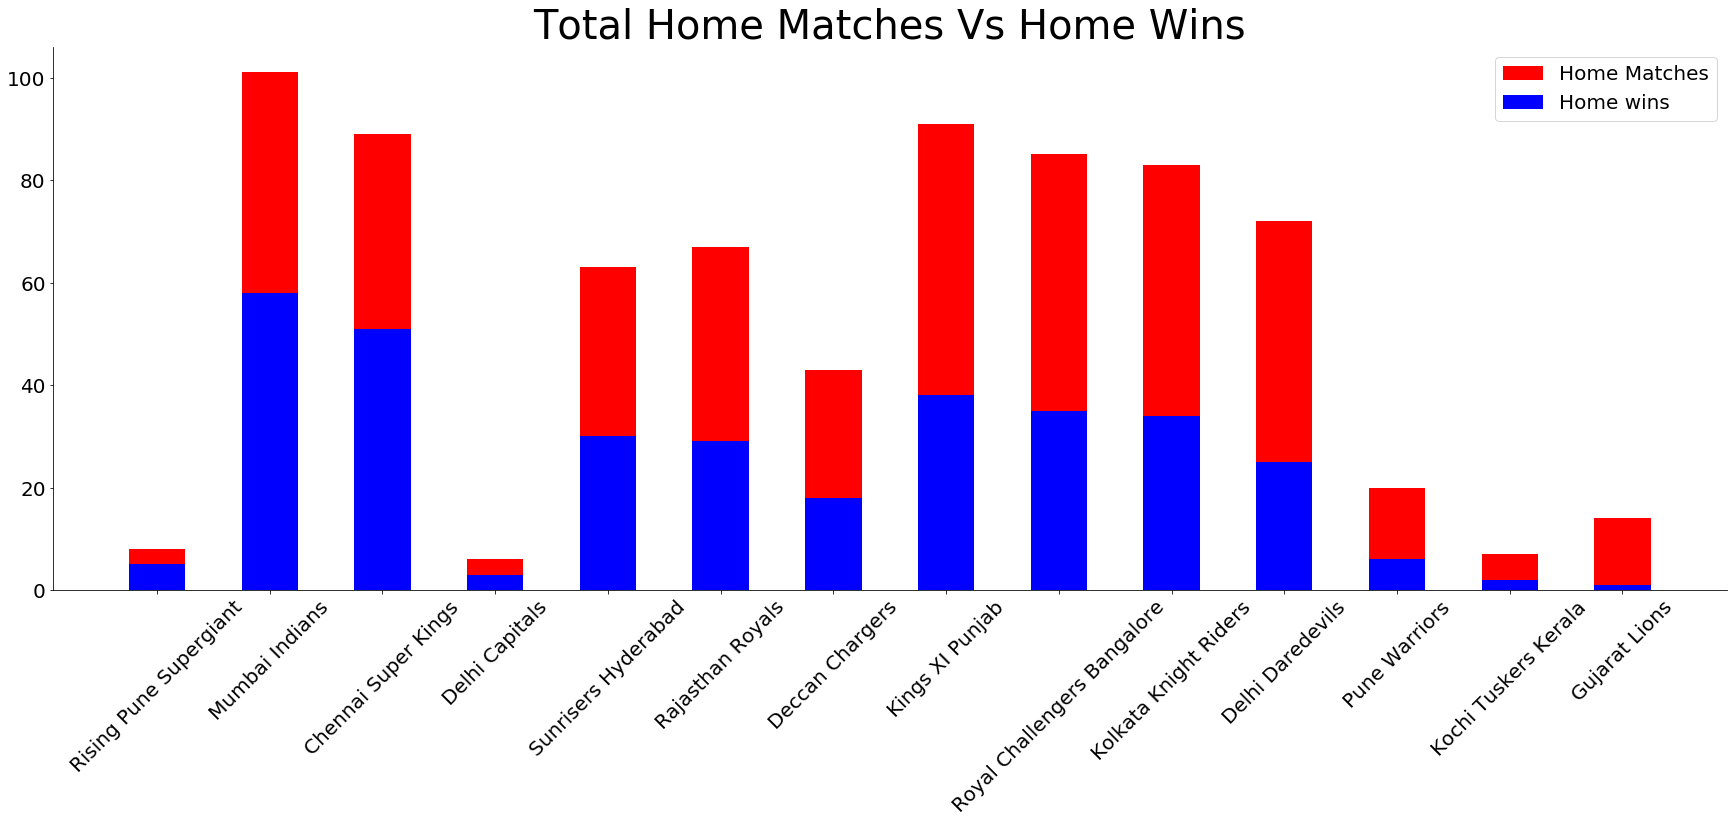

In [21]:
#ploting a stacked bar chart total home matches vs home wins
plt.figure(figsize=(30,10))
plt.bar(teamwise_home_and_away["team"],teamwise_home_and_away["home_matches"],label="Home Matches",color="red",width=0.5)
plt.bar(teamwise_home_and_away["team"],teamwise_home_and_away["home_wins"],label="Home wins",color="blue",width=0.5)
plt.legend(fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.title("total home matches vs home wins".title(),fontsize=40)
[plt.gca().spines[loc].set_visible(False) for loc in ["top","right"]]
plt.show()

#### From above gaph
it can be seen that **Mumbai Indians** and **Chennai Super Kings** peforms quite well in home matches
let us confirm this by ploting home win percentage of teams

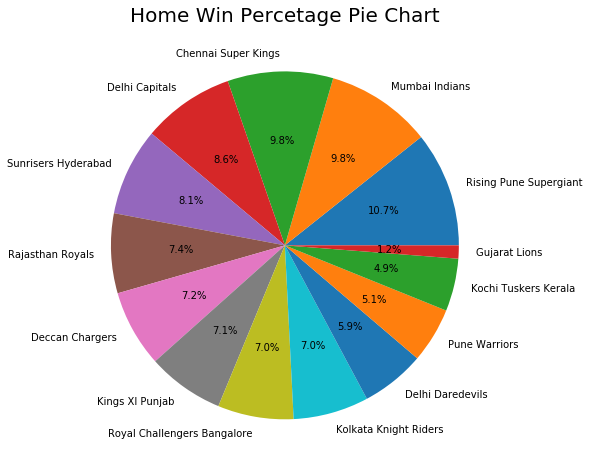

In [22]:
#ploting home win pecentage pie chart
plt.figure(figsize=(8,8))
plt.pie(teamwise_home_and_away["home_win_percentage"],labels=teamwise_home_and_away["team"],autopct="%1.1f%%")
plt.title("home win percetage pie chart".title(),fontsize=20)
plt.show()

#### From above chart
It can be seen in the above chart that **Rising Pune Supergiant** has highest wining percentage
This contradict with our pevious analysis on inspection of data it ca be see that a few teams has only played minimal no. of matches hence they have insufficent data or can be considered outliers hence we should remove such data   

In [23]:
#removing teams with less than 40 total mathes
teamwise_home_and_away = teamwise_home_and_away[(teamwise_home_and_away["home_matches"]+teamwise_home_and_away["away_matches"])>40]
teamwise_home_and_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
10,Delhi Daredevils,25,42,72,89,34.722222,47.191011
11,Pune Warriors,6,6,20,26,30.000000,23.076923


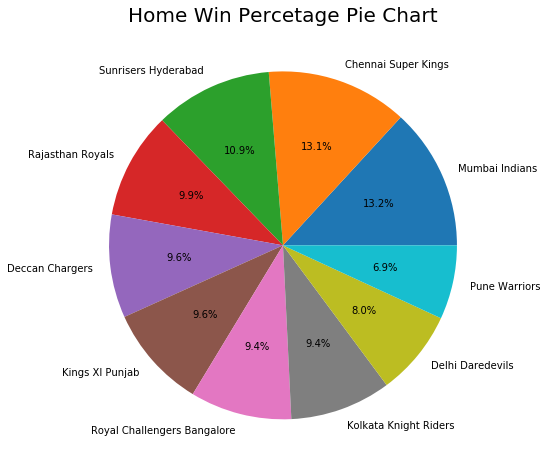

In [24]:
#Ploting home win % pie chart
plt.figure(figsize=(8,8))
plt.pie(teamwise_home_and_away["home_win_percentage"],labels=teamwise_home_and_away["team"],autopct="%1.1f%%")
plt.title("home win percetage pie chart".title(),fontsize=20)
plt.show()

#### From above chat
It can be clearly seen that **Mumbai Indian** and **Chennai Super Kings** has high win percentage
**Mumbai Indians** Perform slightly better

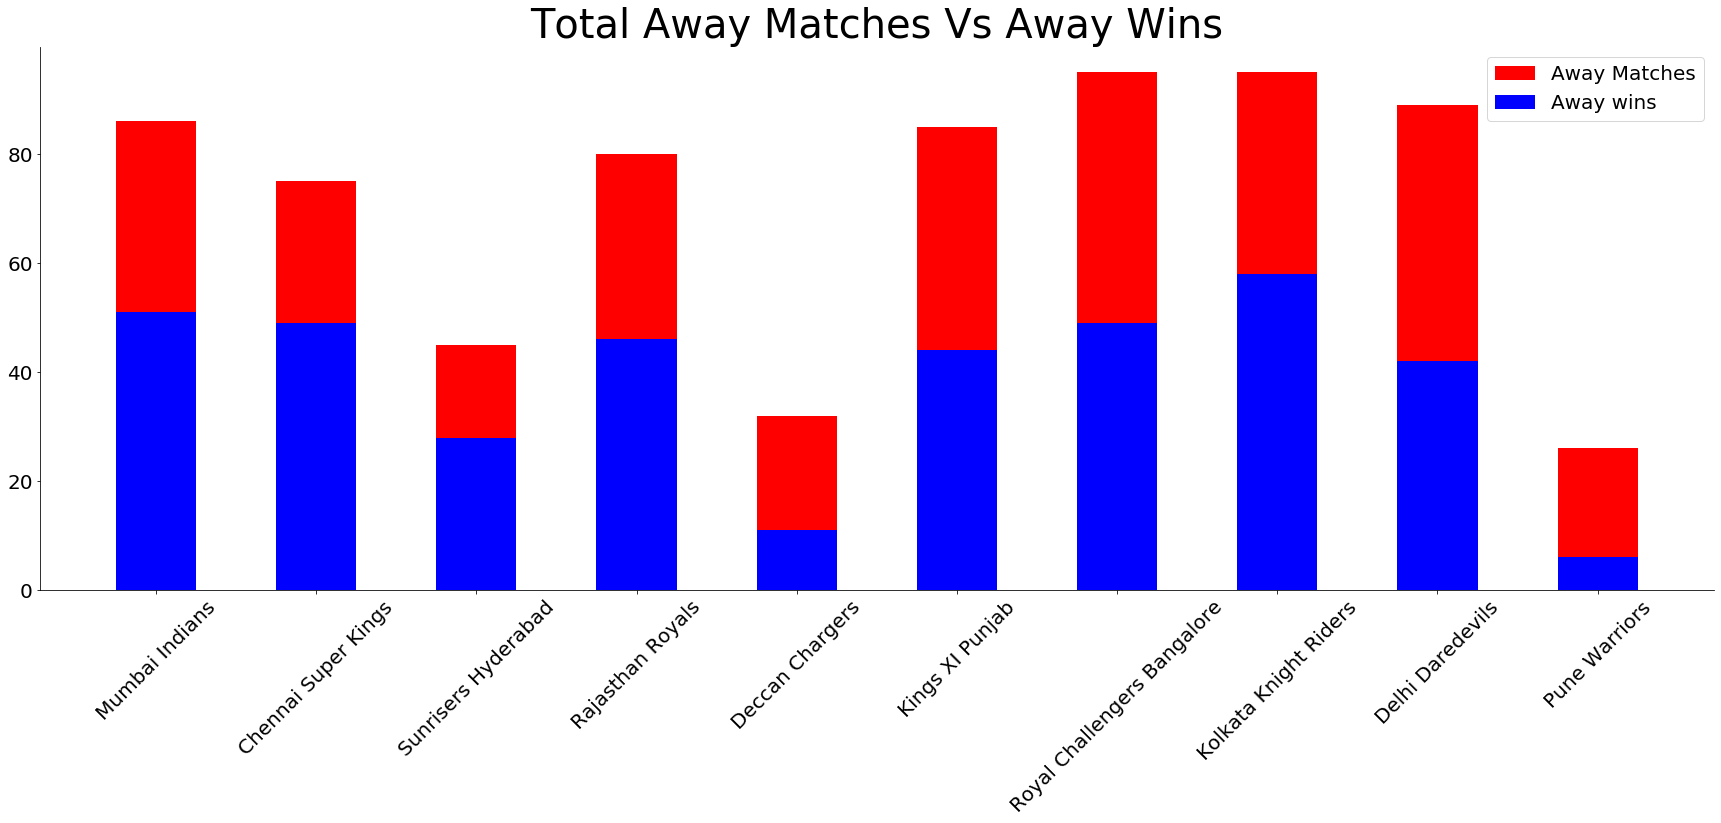

In [25]:
#plotig a stacked bar chart for total away matches vs away wins  
plt.figure(figsize=(30,10))
plt.bar(teamwise_home_and_away["team"],teamwise_home_and_away["away_matches"],label="Away Matches",color="red",width=0.5)
plt.bar(teamwise_home_and_away["team"],teamwise_home_and_away["away_wins"],label="Away wins",color="blue",width=0.5)
plt.legend(fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.title("total away matches vs away wins".title(),fontsize=40)
[plt.gca().spines[loc].set_visible(False) for loc in ["top","right"]]
plt.show()

#### From above plot
It can be seen that **Mumbai Indians** and **Chennai Super Kings** performs well on away matches also
Let us cofirm this by ploting a pie chat of away win percentage

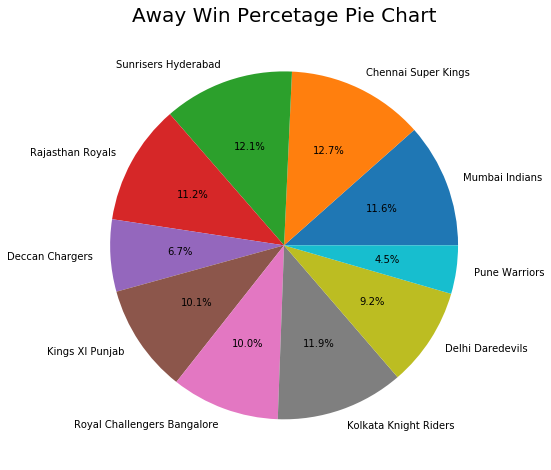

In [26]:
#plotting away win peentage pie chart
plt.figure(figsize=(8,8))
plt.pie(teamwise_home_and_away["away_win_percentage"],labels=teamwise_home_and_away["team"],autopct="%1.1f%%")
plt.title("away win percetage pie chart".title(),fontsize=20)
plt.show()

#### From above plot
Above plot cofirms that **Mumbai Indians** and **Chennai Super Kings** perform good also in away matches
also chennai super king has slightly high away wining percentage


## Matches Dataset

### Winning Average of All Teams
Let us plot winning average of all the team in vaious seasons to see their pefomance in individual seasons and overall seasons

In [27]:
#defining a fuction that take team and season as perameter and returns wining average of team in that season
def winning_avg(season, team):
    total_match = len(matches[(matches["Season"]==season) & ((matches["team1"] == team) | (matches["team2"] == team))])
    total_win = len(matches[(matches["Season"]==season) & ((matches["team1"] == team) | (matches["team2"] == team)) & (matches["winner"] == team)])
    try:
        res = round(total_win/total_match, 2)*100
    except:
        res = np.NaN
    return res

In [28]:
season = sorted(matches["Season"].unique())
team = matches["team1"].unique()


In [29]:
def win_avg_plot(season,team):
    plt.figure(figsize=(14,7))
    plt.title("winning average of all teams in all season".title(),fontsize=20)
    plt.xlabel("Seasons",fontsize=13)
    plt.ylabel("Wining Average",fontsize=13)
    win_avg = [[winning_avg(S,T) for S in season] for T in team]
    j = 0
    for i in win_avg:
        plt.plot(season, i, label = team[j], marker="o")
        j+=1
    plt.legend(bbox_to_anchor=(1,1),frameon=False,fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    [plt.gca().spines[loc].set_visible(False) for loc in ["top","right"]]
    plt.show()    

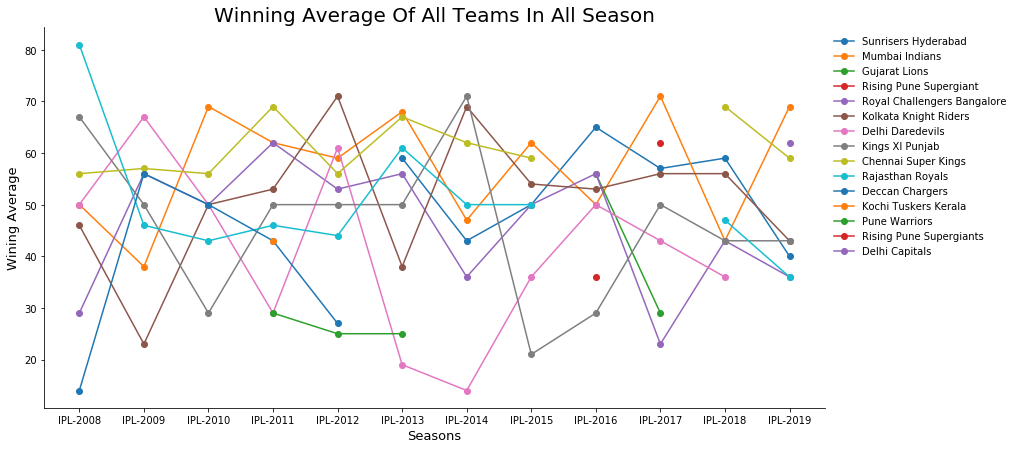

In [30]:
win_avg_plot(season,team)

#### From above plot
The above plot seems messy and analysis seems quite difficult on an deeper inspection it can be seen that
there are a few teams which have played in less than 4 seasons hence removing such teams ad ploting the
gaph in two pats for better analysis

In [31]:
team = np.delete(team,[2,3,11,12,13,14])
team

array(['Sunrisers Hyderabad', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers'], dtype=object)

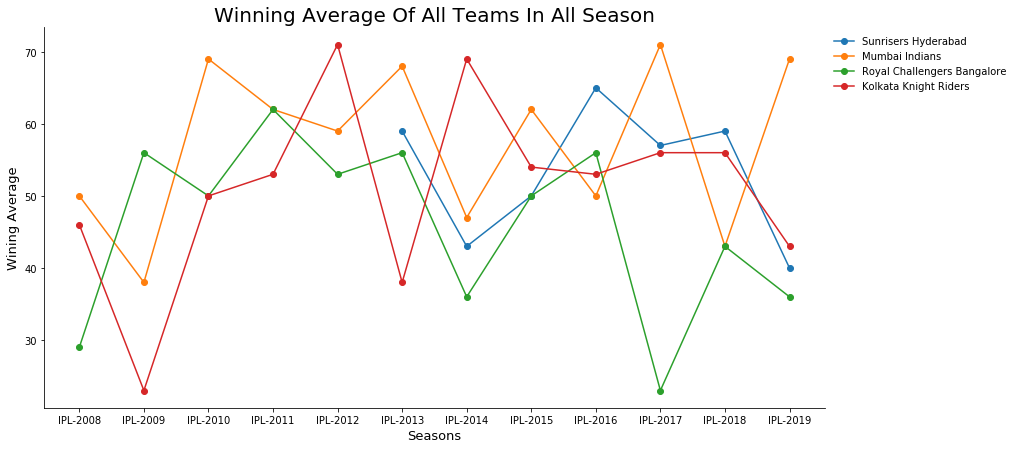

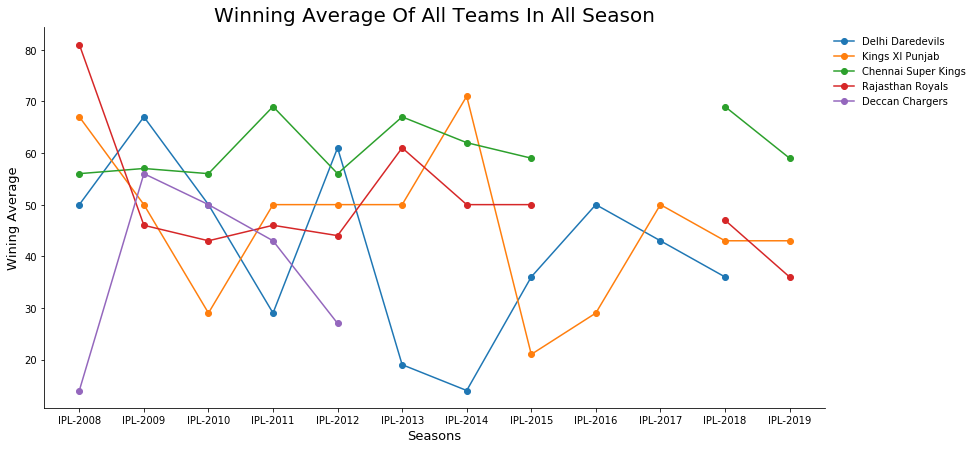

In [32]:
win_avg_plot(season,team[:len(team)//2])
win_avg_plot(season,team[len(team)//2:])

#### From Above Plot
from above two plots following conlusion can be drawn :
* In season 2008 - **Rajastha Royals** performed better
* In season 2009- **Delhi Daredevils** performed better
* In season 2010- **Mumbai Indians** performed better
* In season 2011- **Chennai Super Kings** peformed better
* In season 2012- **Kolkata Knight Riders** performed better
* In season 2013- **Mumbai Indians** performed better
* In season 2014- **Kings XI Punjab** performed better
* In season 2015- **Mumbai Indians** performed better
* In season 2016- **Sunrisers Hyderabad** performed better
* In season 2017- **Mumbai Indians** performed better
* In season 2018- **Chennai Super Kings** performed better
* In season 2019- **Mumbai Indians** performed better

Over all it can be seen that **Mumbai Indians** performs consistently better and has win average over 50 in all seasons

### Best Team
From above few plots it seems clear that **Mumbai Indians** is the best team in IPL as they perform great\
in home matches as well as away matches, has a consistent win average  

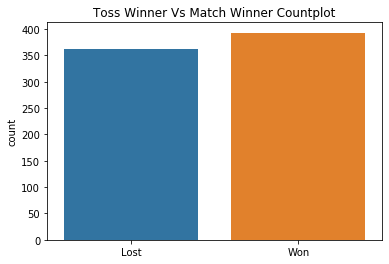

In [33]:
#ploting count of those of who won toss as well as match 
data = matches["toss_winner"] == matches["winner"]
data = data.apply(lambda x: "Won" if x else "Lost")
sns.countplot(x=data)
plt.title("toss winner vs match winner countplot".title())
plt.show()

#### From above plot
    No solid conclusion can be found as who wins toss  have won and lost fairly equal amount 

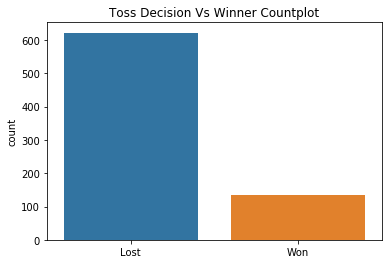

In [34]:
#ploting count plot for those who won the toss and opted to bat and wo the match
data = (matches["toss_winner"] == matches["winner"]) & (matches["toss_decision"] == "bat")
data = data.apply(lambda x: "Won" if x else "Lost")
sns.countplot(x=data)
plt.title("toss decision vs winner countplot".title())
plt.show()

#### From above plot
    it can be clearly seen that those who choose to bat for first inning tend to loose the match hence, it can be concluded that defending the score is much hader. 

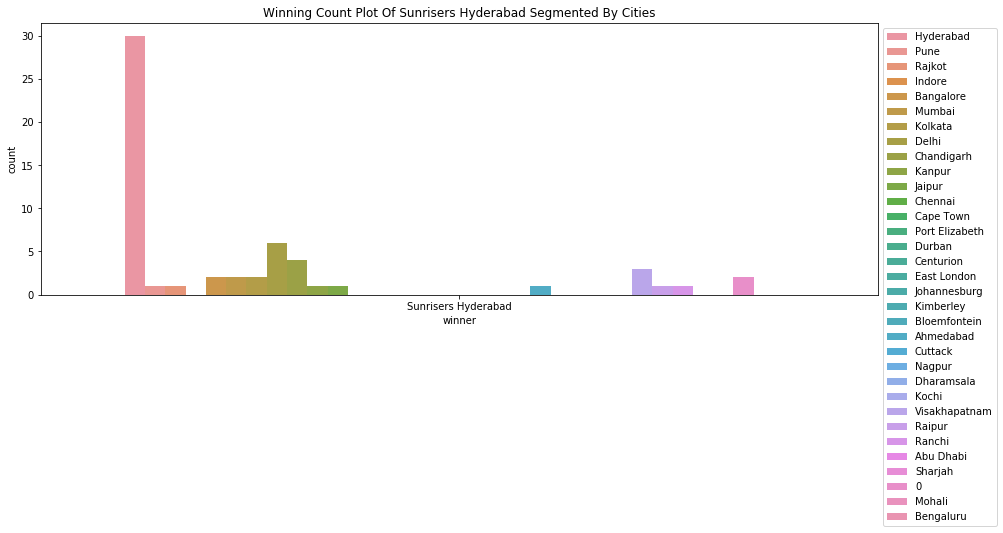

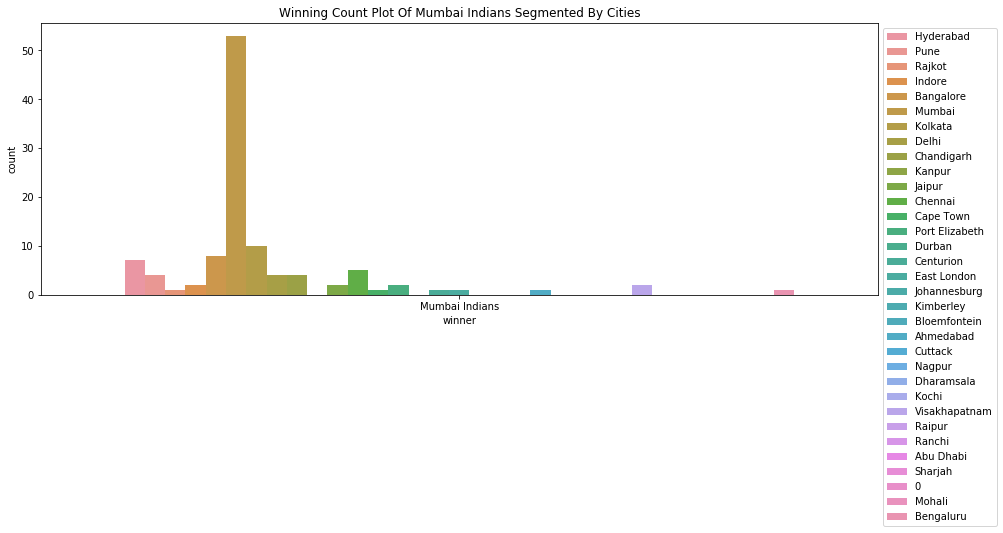

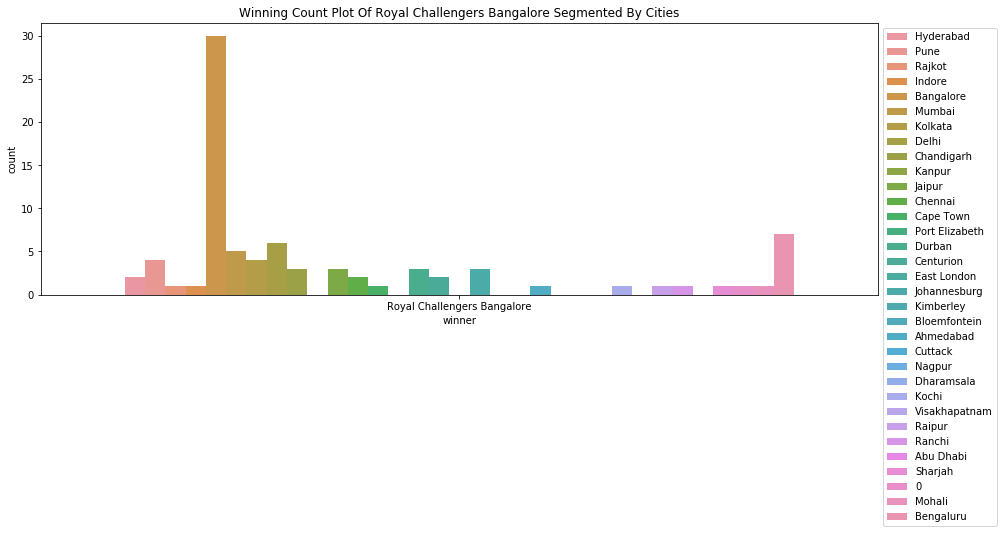

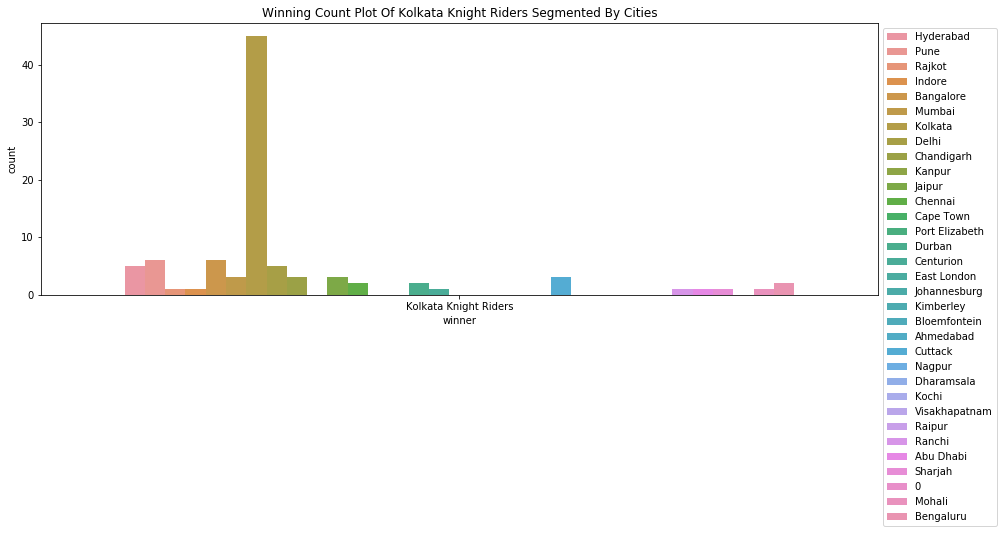

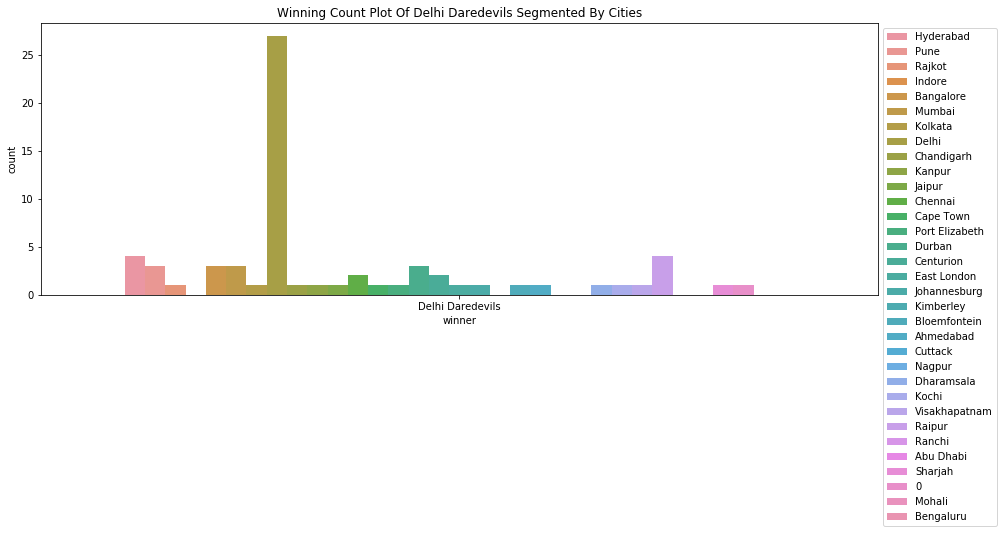

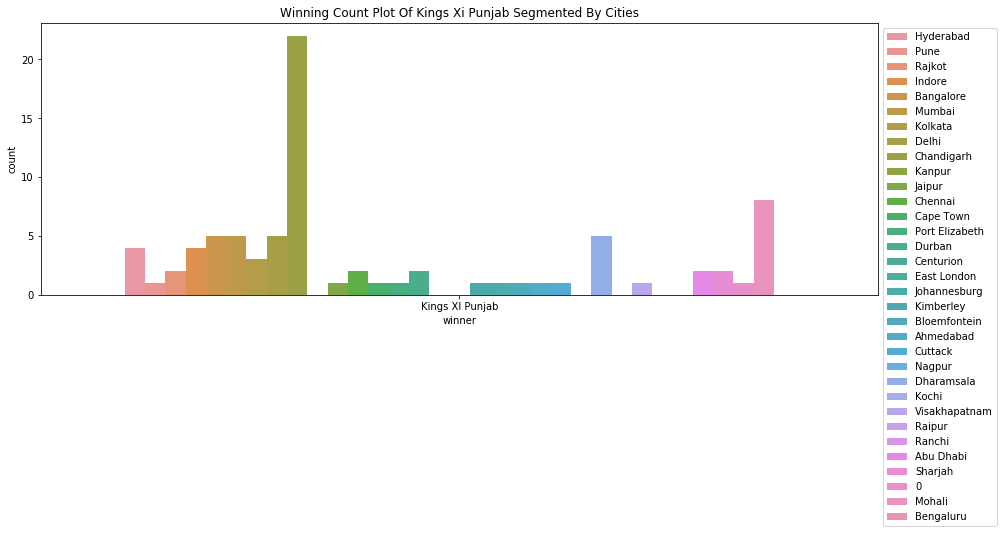

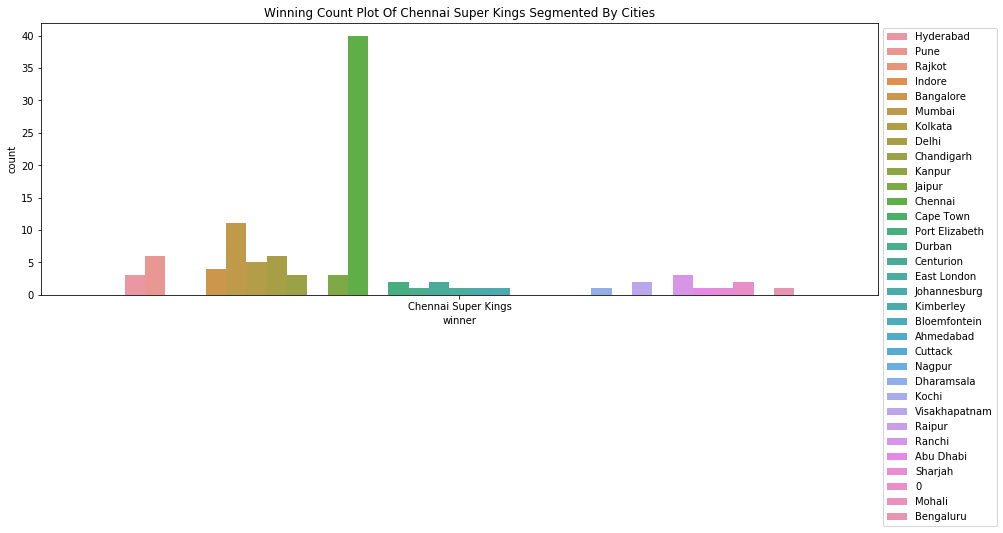

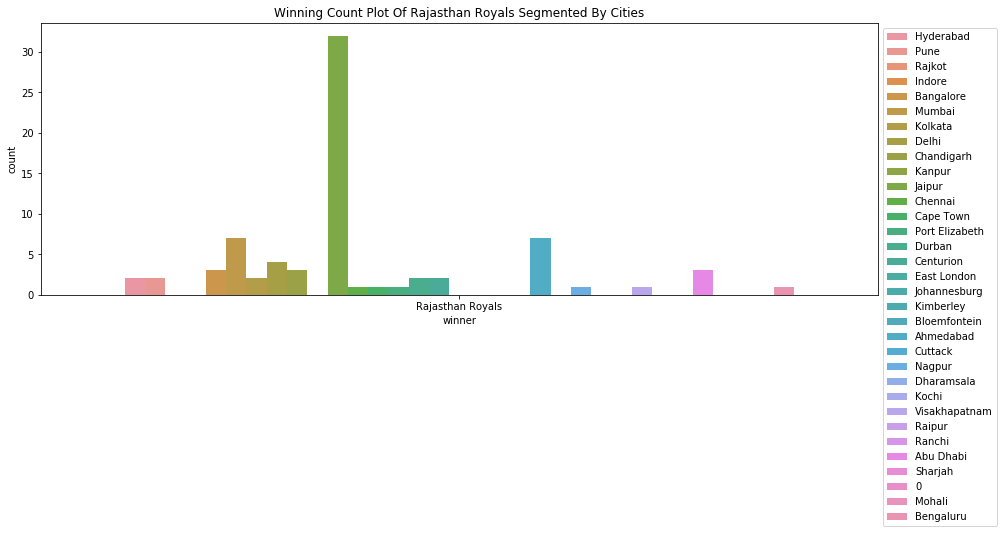

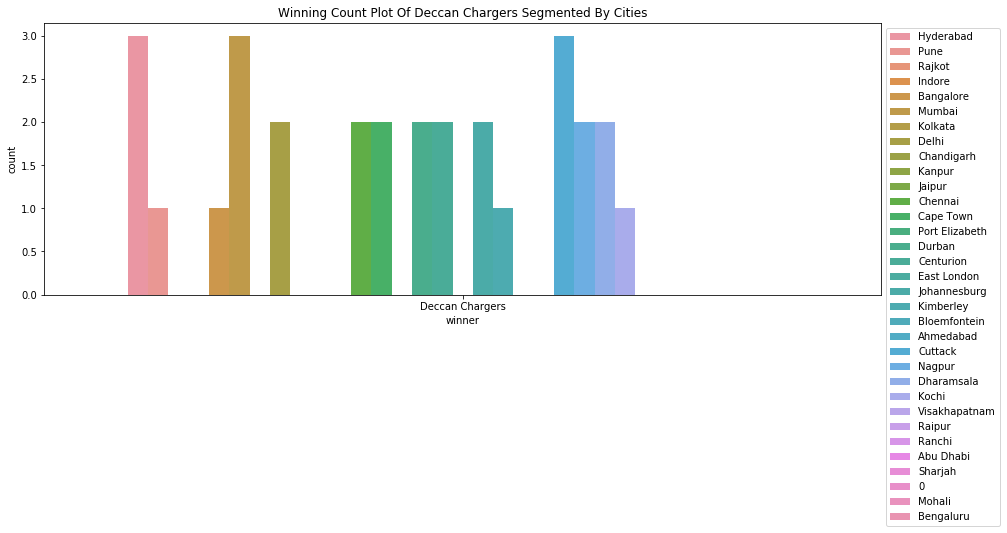

In [35]:
#ploting winning count plot of teams segmented by cities 
for i in team:
    plt.figure(figsize=(15,5))
    data = matches[(matches["winner"] == i)]["winner"]
    sns.countplot(x=data,hue="city",data=matches)
    plt.legend(bbox_to_anchor=(1,1))
    plt.title("winning count plot of {} segmented by cities".format(i).title())
    plt.show()

#### From above plot
    it can be seen that teams tend to perform better in their city which is an obvious result

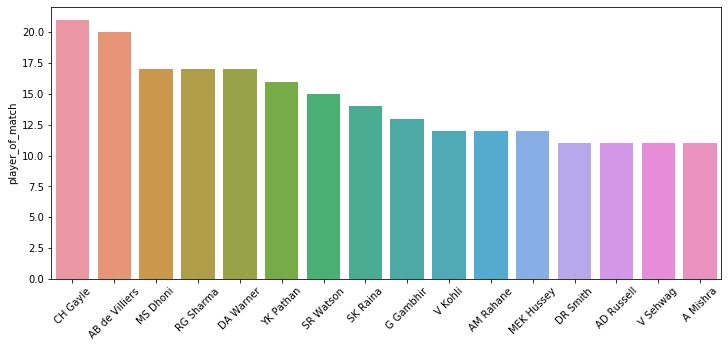

In [36]:
#ploting players who have been player of the match more ten 10 times
plt.figure(figsize=(12,5))
data = matches["player_of_match"].value_counts()
data = data[data>10]
sns.barplot(x=data.index, y=data)
plt.xticks(rotation=45)
plt.show()

#### From above graph
    It can be seen that Chris Gayle, AB de Villiers and David Warner are the top contender for the player of the match

# Most_Runs_Average_Strikerate Dataset

In [37]:
most_runs_average_strikerate.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


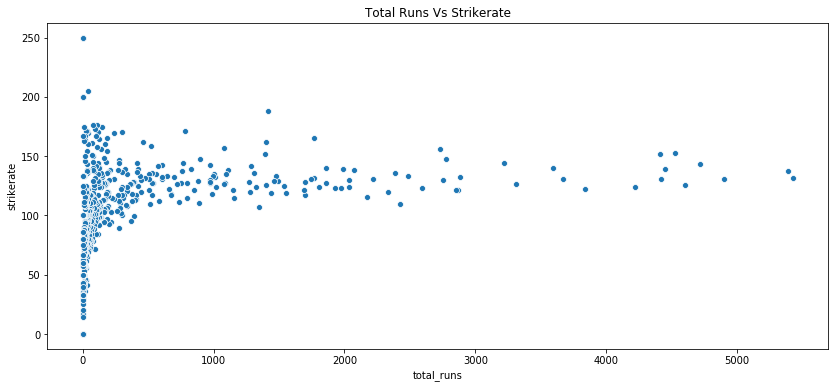

In [38]:
#Ploting total runs vs strike rate
plt.figure(figsize=(14,6))
plt.title("total runs vs strikerate".title())
sns.scatterplot(x="total_runs", y="strikerate", data=most_runs_average_strikerate)
plt.show()

#### From above plot 
It can be seen that players with higher or lower strike rate tends to score lesser runs and the players in range of 100-150 strike rate has better total runs as well 

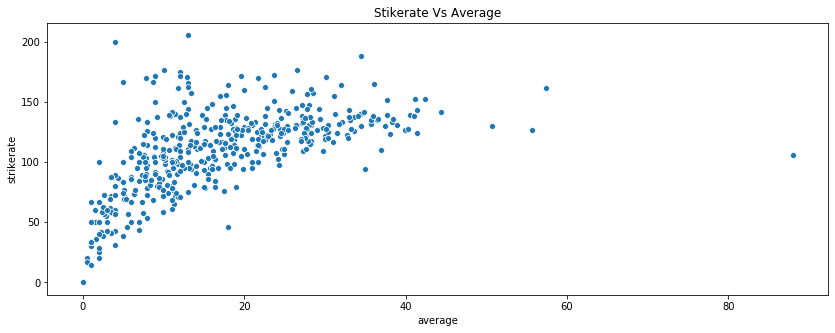

In [39]:
#ploting strikerate vs average
plt.figure(figsize=(14,5))
plt.title("stikerate vs average".title())
sns.scatterplot(x="average",y="strikerate",data=most_runs_average_strikerate)
plt.show()

#### From above plot
It can be seen that players strike rate between 100-150 also has good average which is an expected output 

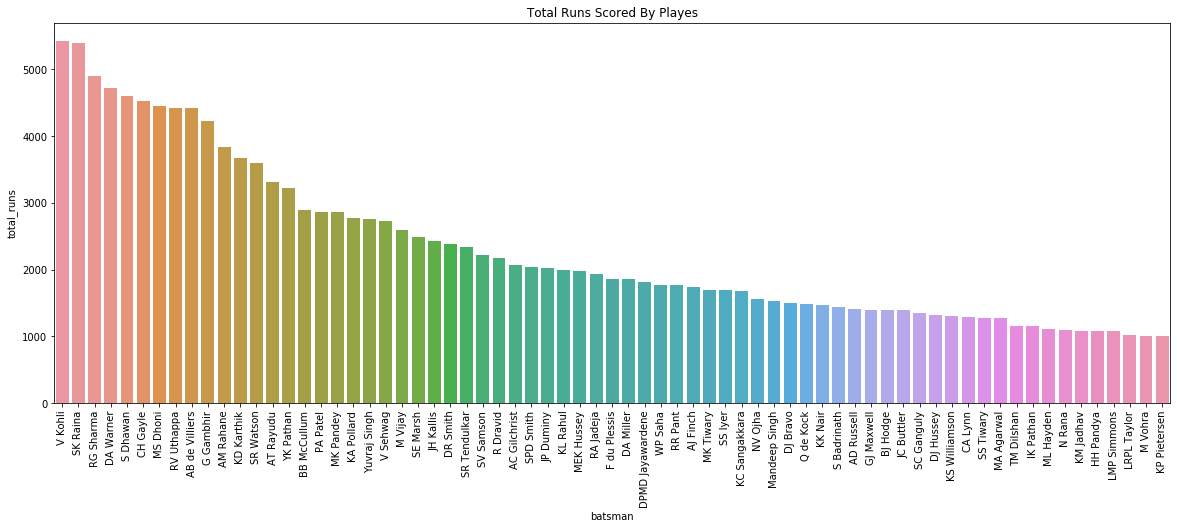

In [40]:
#ploting players who have scored more than 1000 total runs
data = most_runs_average_strikerate[most_runs_average_strikerate["total_runs"]>1000]
plt.figure(figsize=(20,7))
plt.title("total runs scored by playes".title())
sns.barplot(y="total_runs",x="batsman",data=data)
plt.xticks(rotation="vertical")
plt.show()

#### From above plot 
It can be seen that Virat Kohli has scored most runs


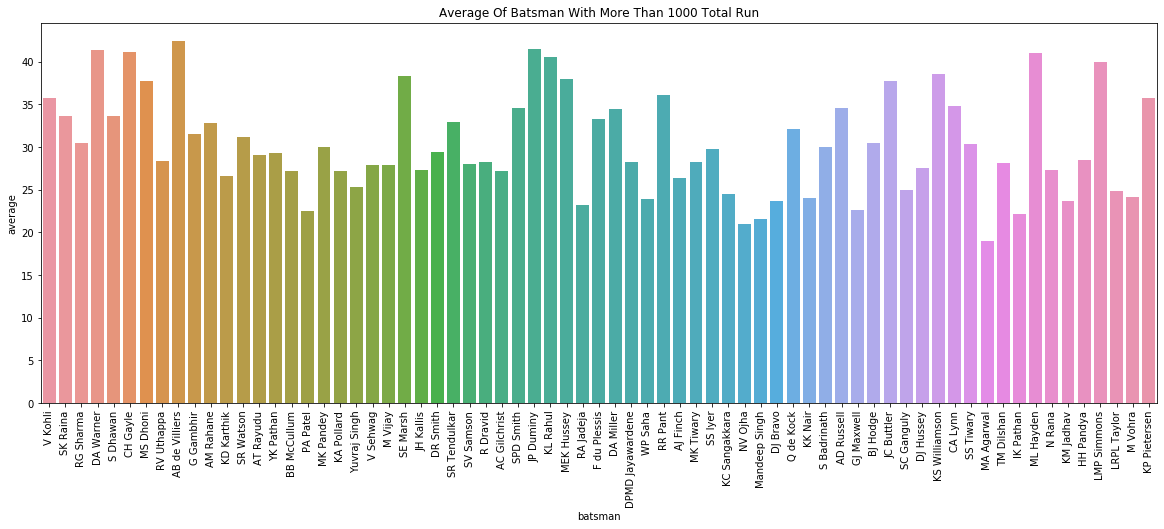

In [41]:
#ploting average of batsman with more than 1000 run
plt.figure(figsize=(20,7))
plt.title("average of batsman with more than 1000 total run".title())
sns.barplot(x="batsman",y="average",data=data)
plt.xticks(rotation="vertical")
plt.show()

#### From above plot
it can be seen that AB de Villers has a high average

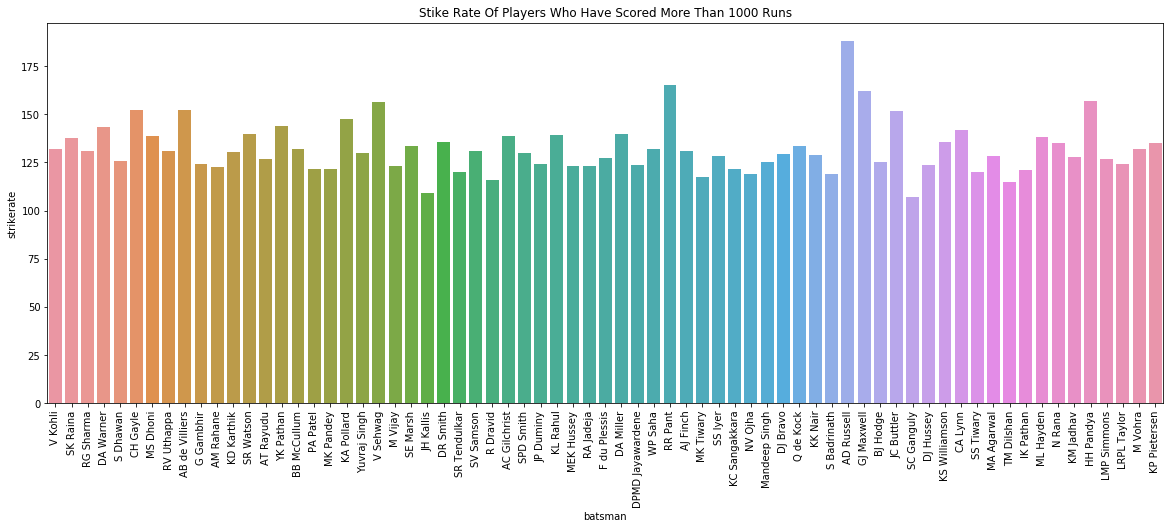

In [42]:
#ploting strike rate of players who have scored more than 1000 runs
plt.figure(figsize=(20,7))
plt.title("stike rate of players who have scored more than 1000 runs".title())
sns.barplot(x="batsman",y="strikerate",data=data)
plt.xticks(rotation="vertical")
plt.show()

#### From above plot 
It can be seen that AD russel has highest stike rate and others have stike rate in range of 125-150 

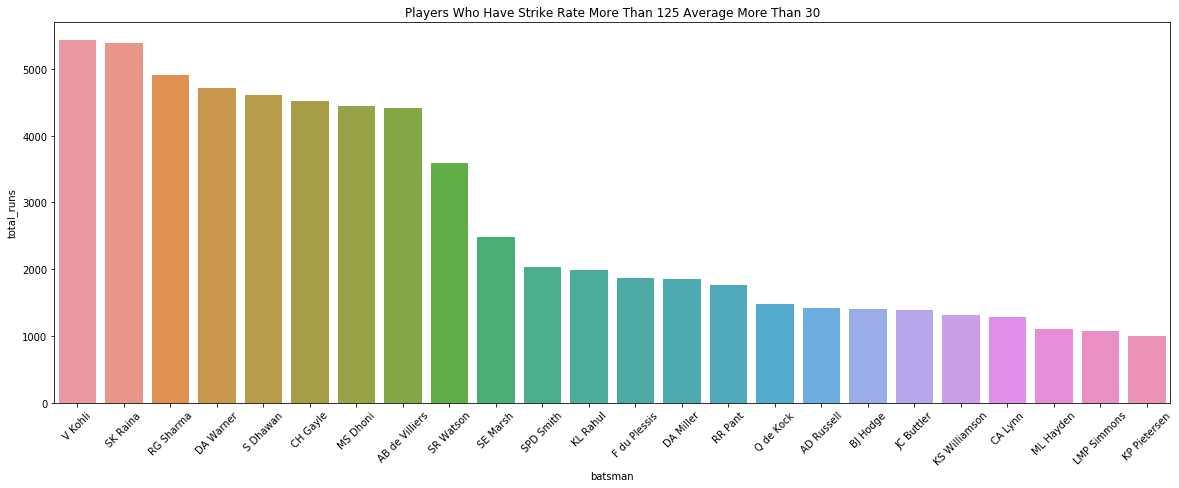

In [43]:
#ploting such players who have strike rate more than 125 average more than 30
data = data[(data["strikerate"]>125) & (data["average"]>30)]
plt.figure(figsize=(20,7))
plt.title("players who have strike rate more than 125 average more than 30".title())
sns.barplot(x="batsman",y="total_runs",data=data)
plt.xticks(rotation=45)
plt.show()

### Best Batsman Overall
from above few plots it can easily be concluded that **Virat Kohli** is the best player as he has most runs a good average and a decent stike rate  

# Deliveries Dataset

In [44]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [45]:
#merging season column from mathes dataset in deliveries dataset using match_id 
deliveries = pd.merge(deliveries, matches[["id","Season"]],how="left",left_on="match_id",right_on="id")

In [46]:
#creating a pivot table grouped by season and batsman
data = pd.pivot_table(deliveries,values="batsman_runs",index=["Season","batsman"],aggfunc="sum")


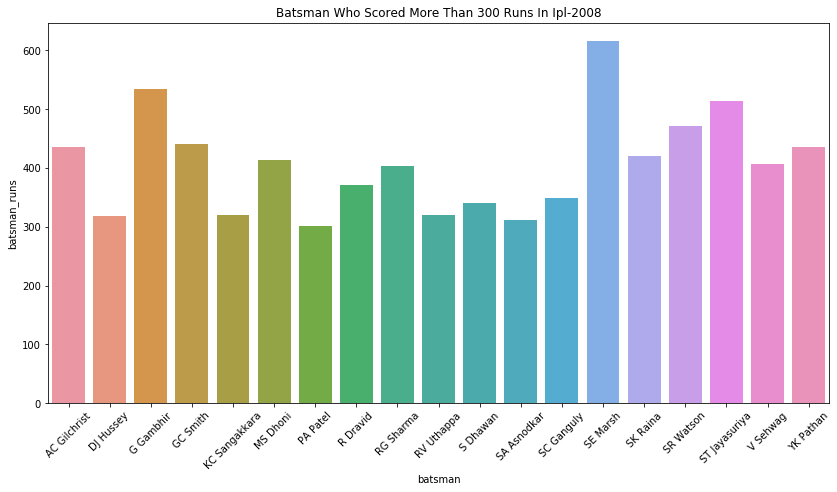

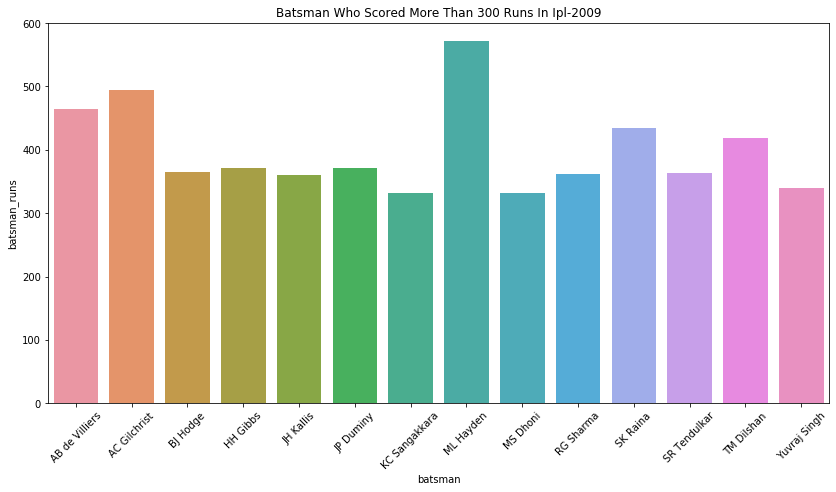

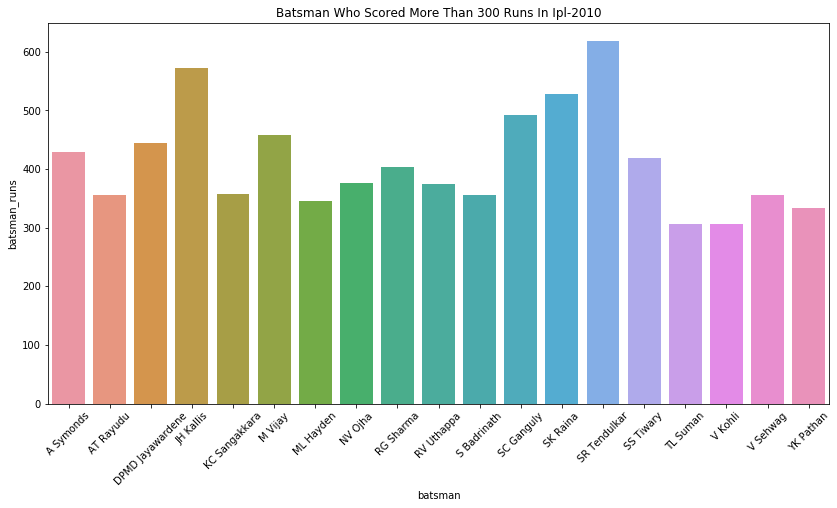

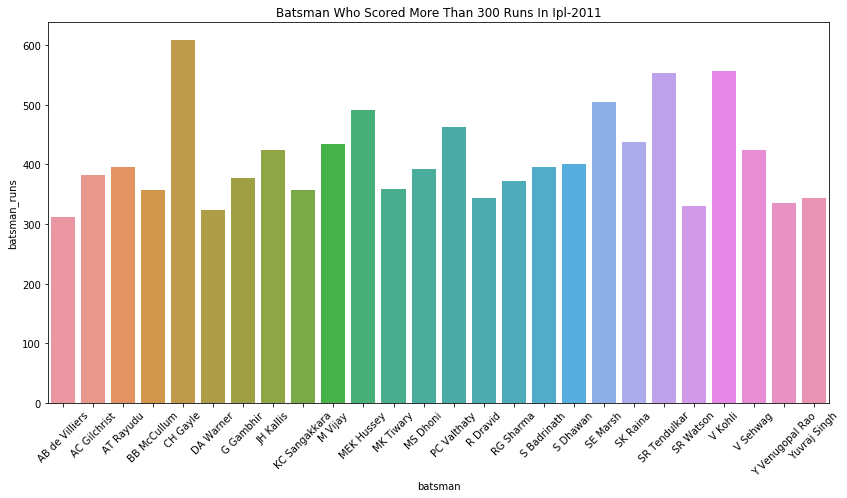

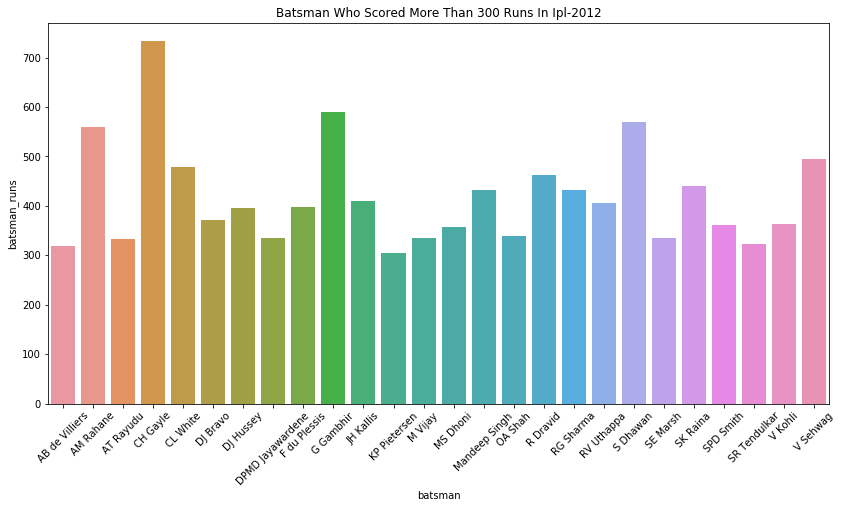

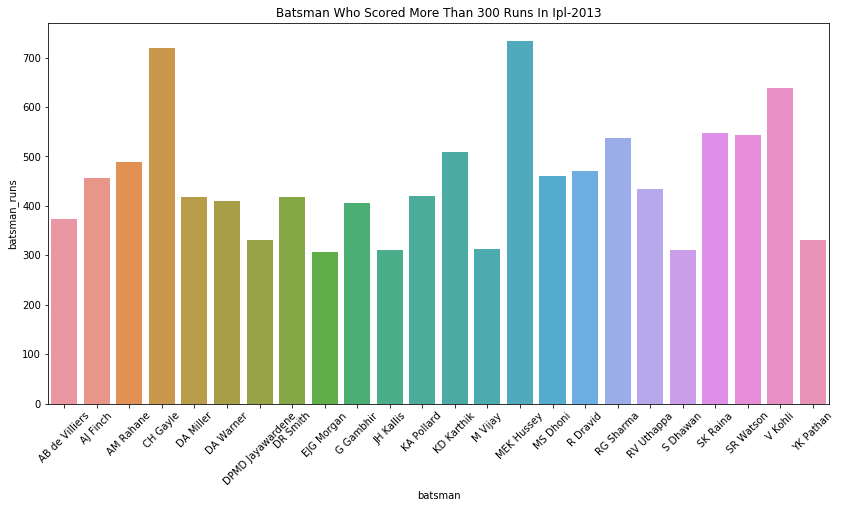

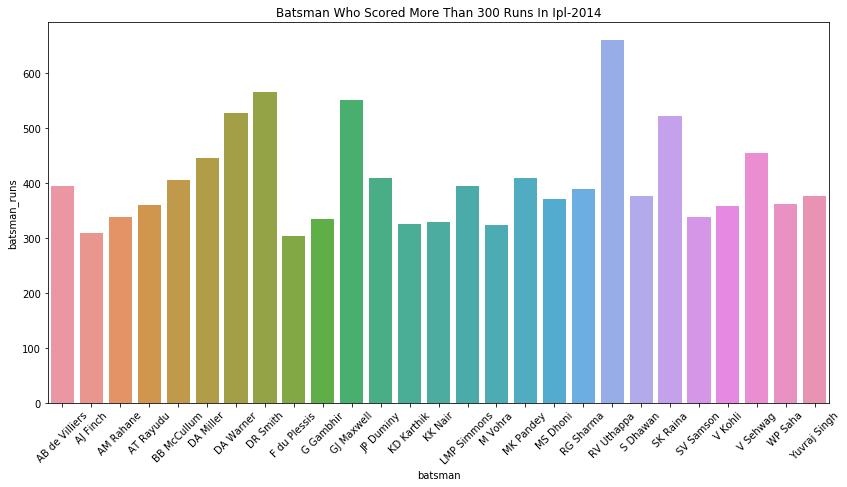

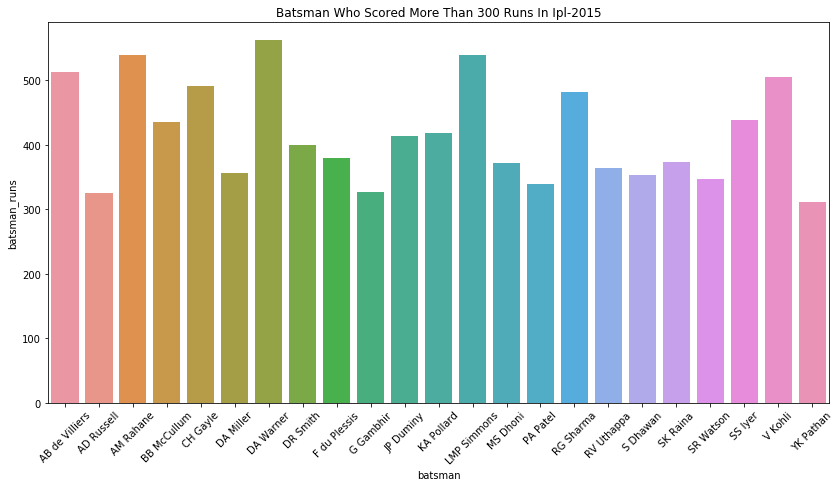

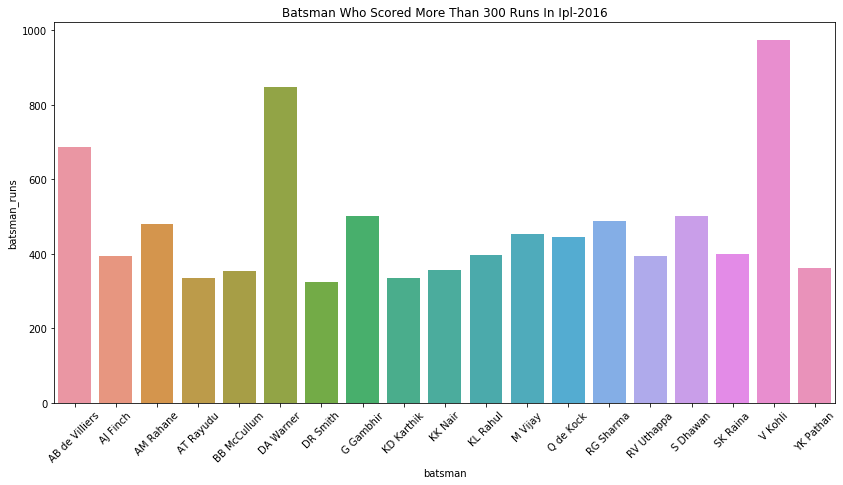

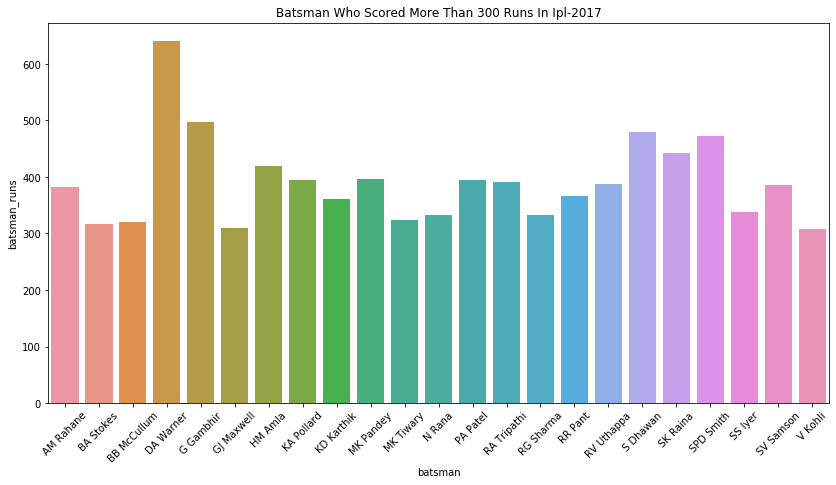

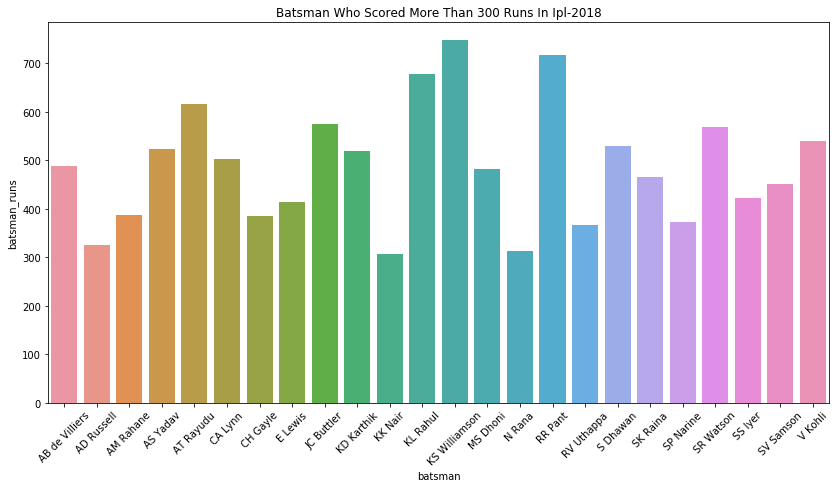

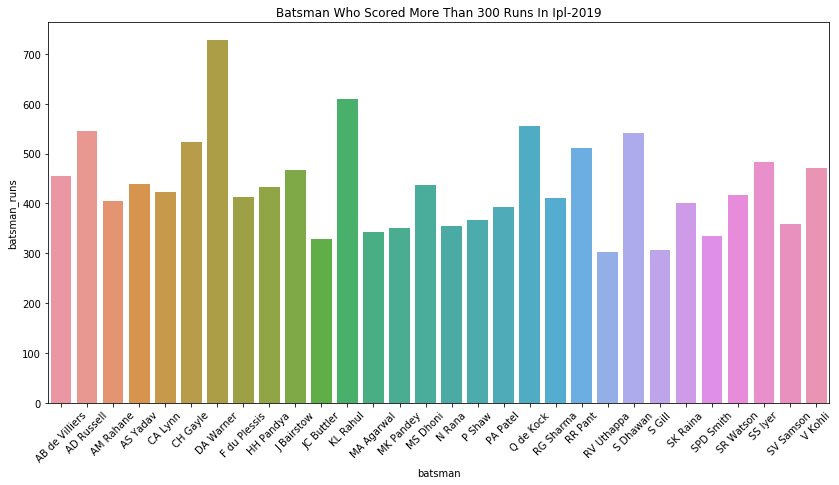

In [47]:
#finding ploting total batsman who have scored more than 300 runs in each season 
data = data[data["batsman_runs"]>300]
for i in season:
    plt.figure(figsize=(14,7))
    plt.title("batsman who scored more than 300 runs in {}".format(i).title())
    sns.barplot(x=data.loc[i].index,y=data.loc[i]["batsman_runs"])
    plt.xticks(rotation=45)
    plt.show()

### Best Batsman Seasonwise

From above few plots it can be seen that:-
* In IPL-2008 **Shaun Marsh** was best batsman and scored highest runs
* In IPL-2009 **Matthew Hayden** was best batsman and scored highest runs
* In IPL-2010 **Sachin Tendulkar** was best batsman and scored highest runs
* In IPL-2011 **Chris Gayle** was best batsman and scored highest runs
* In IPL-2012 **Chris Gayle** was best batsman and scored highest runs
* In IPL-2013 **Michael Hussey** was best batsman and scored highest runs
* In IPL-2014 **Robin Uthappa** was best batsman and scored highest runs
* In IPL-2015 **David Warner** was best batsman and scored highest runs
* In IPL-2016 **Virat Kohli** was best batsman and scored highest runs
* In IPL-2017 **David Warner** was best batsman and scored highest runs
* In IPL-2018 **Kane Williamson** was best batsman and scored highest runs
* In IPL-2019 **David Warner** was best batsman and scored highest runs

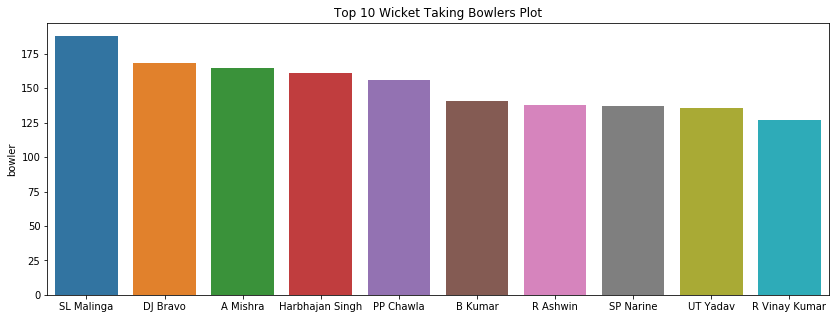

In [48]:
#ploting top 10 wicket taking bowlers plot
data2 = deliveries["bowler"][deliveries["player_dismissed"].notnull()].value_counts().sort_values(ascending= False)[:10]
plt.figure(figsize=(14,5))
plt.title("top 10 wicket taking bowlers plot".title())
sns.barplot(x=data2.index,y=data2)
plt.show()

#### From above plot
It can be seen that the **Lasith Malinga**, **DJ Bravo** and **Amit Mishra** are the most wicket taking bolwers

In [49]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,bowler,wide_runs,bye_runs,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,Season
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,...,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,...,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,0,0,...,0,0,4,0,4,NaN,NaN,NaN,1,IPL-2017
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,...,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,2,0,...,0,0,0,2,2,NaN,NaN,NaN,1,IPL-2017
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,TS Mills,0,0,...,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,TS Mills,0,0,...,0,0,0,1,1,NaN,NaN,NaN,1,IPL-2017
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,A Choudhary,0,0,...,0,0,1,0,1,NaN,NaN,NaN,1,IPL-2017
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,A Choudhary,0,0,...,0,0,4,0,4,NaN,NaN,NaN,1,IPL-2017
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,A Choudhary,0,0,...,1,0,0,1,1,NaN,NaN,NaN,1,IPL-2017


In [50]:
#finding economy rate of bowlers
data= pd.DataFrame(deliveries["bowler"].value_counts())
data["total_run"] = deliveries.groupby("bowler")["total_runs"].sum()
data["total_over"] = data["total_run"].apply(lambda x: x/6 if x%6 ==0 else ((x%6)/10)+(x//6))
data["economy"] = round(data["total_run"]/data["total_over"],5)
data.head()

,bowler,total_run,total_over,economy
Harbhajan Singh,3451,4050,675.0,6.00000
A Mishra,3172,3850,641.4,6.00249
PP Chawla,3157,4153,692.1,6.00058
R Ashwin,3016,3391,565.1,6.00071
SL Malinga,2974,3511,585.1,6.00068


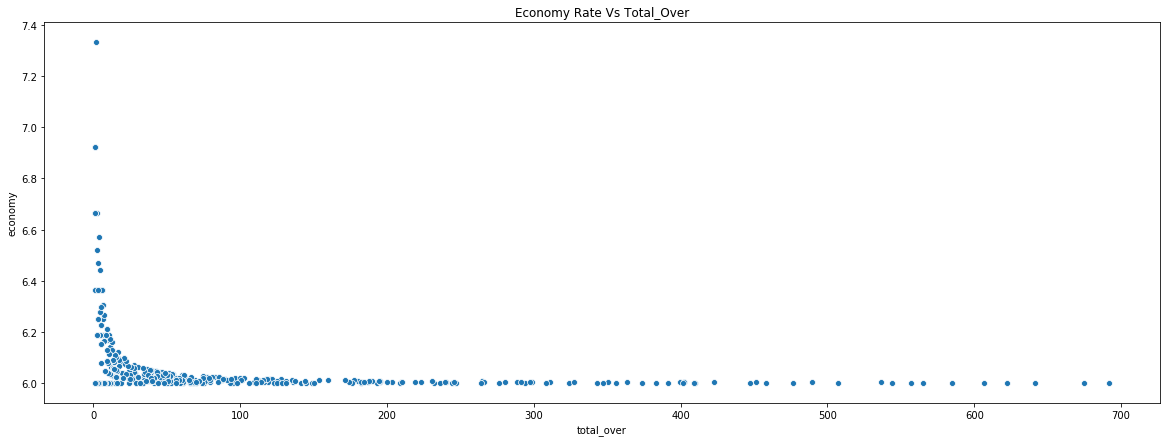

In [51]:
#ploting economy rate vs total_over
data = data[data["economy"]<8]
plt.figure(figsize=(20,7))
plt.title("economy rate vs total_over".title())
sns.scatterplot(y=data.economy, x = data.total_over)
plt.show()

#### From above plot 
It is clear that bowlers who have bowled more over has economy rate of 6 

In [52]:
#adding total wicket count in data
data["total_wicket"] = deliveries[deliveries["player_dismissed"].notnull()]["bowler"].value_counts()
data.head()

,bowler,total_run,total_over,economy,total_wicket
Harbhajan Singh,3451,4050,675.0,6.00000,161.0
A Mishra,3172,3850,641.4,6.00249,165.0
PP Chawla,3157,4153,692.1,6.00058,156.0
R Ashwin,3016,3391,565.1,6.00071,138.0
SL Malinga,2974,3511,585.1,6.00068,188.0


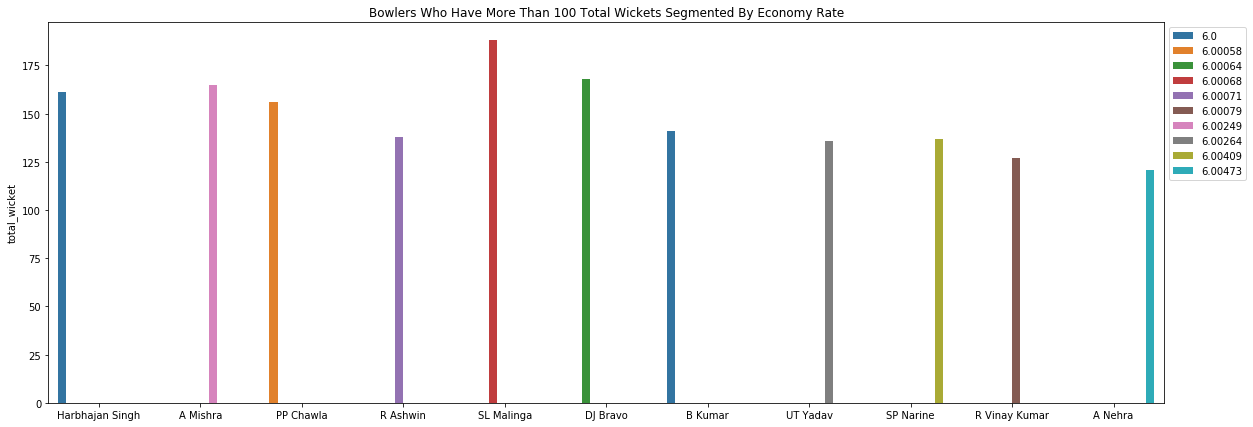

In [53]:
#ploting bowlers who have more than 100 total wickets segmented by economy rate
data = data[data["total_wicket"]>120]
plt.figure(figsize=(20,7))
plt.title("bowlers who have more than 100 total wickets segmented by economy rate".title())
sns.barplot(x=data.index,y=data["total_wicket"],hue=data["economy"])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Best Bowler Overall
From above few plots it is clear that **Lasith Malinga** is the best bowler overall as he has a good economy rate as well as highest wicket count   

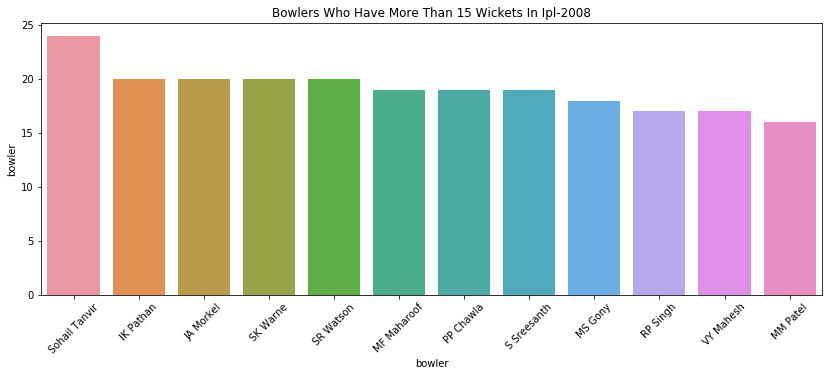

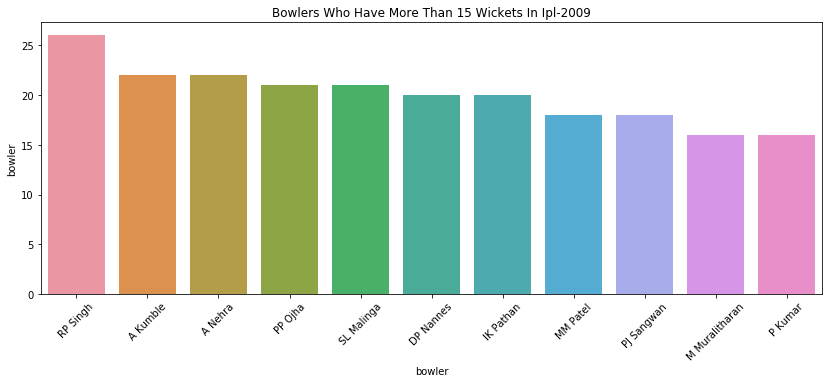

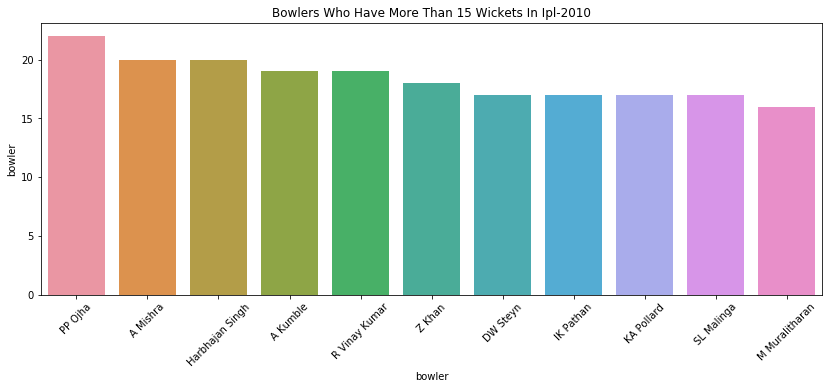

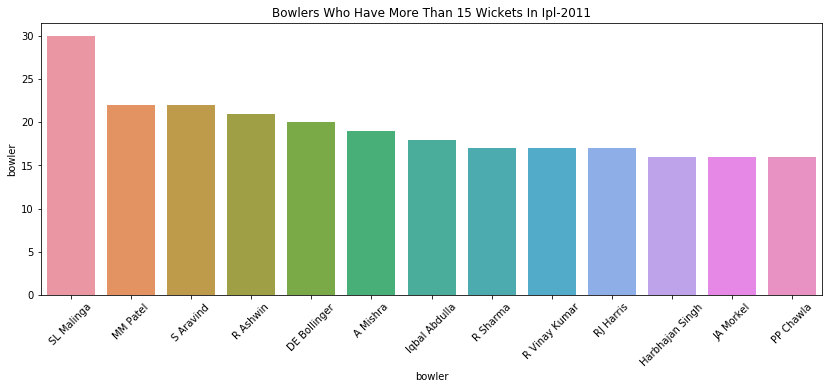

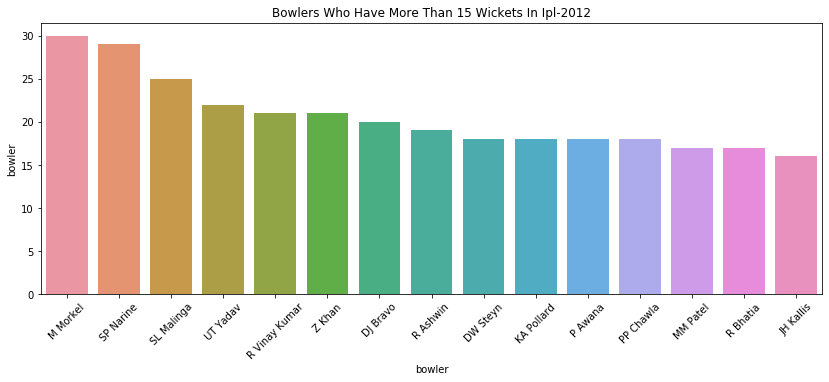

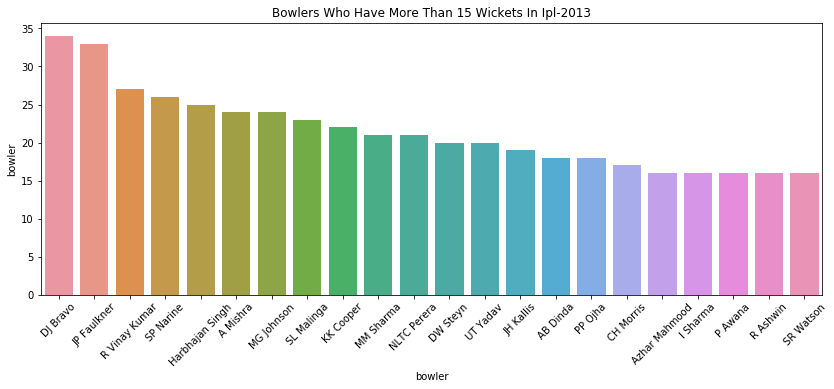

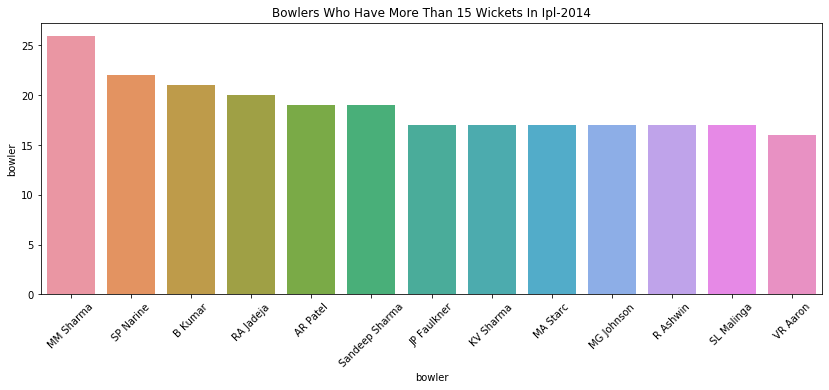

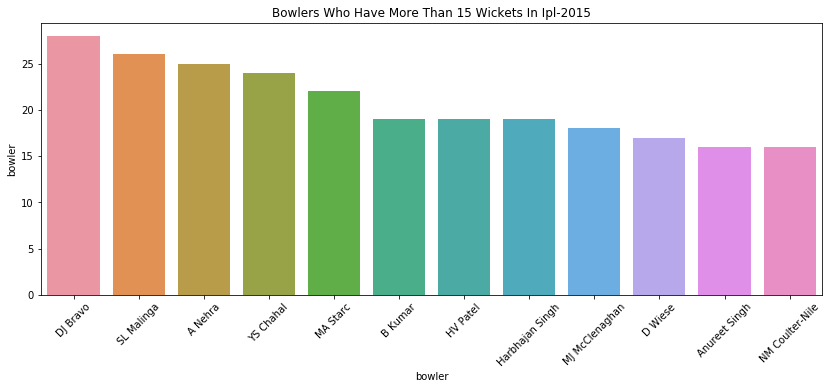

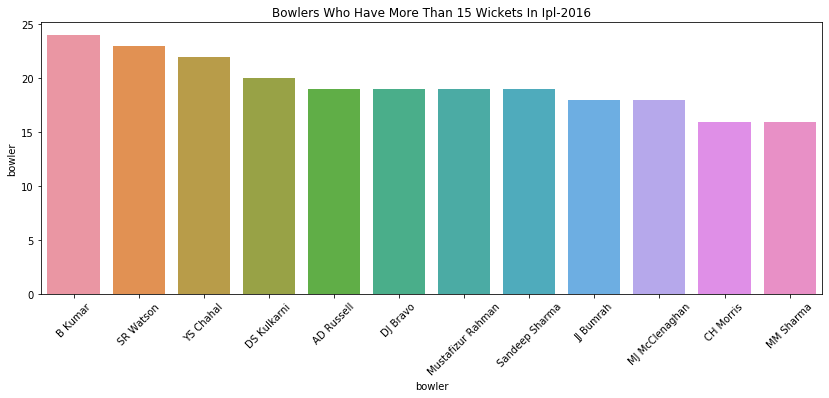

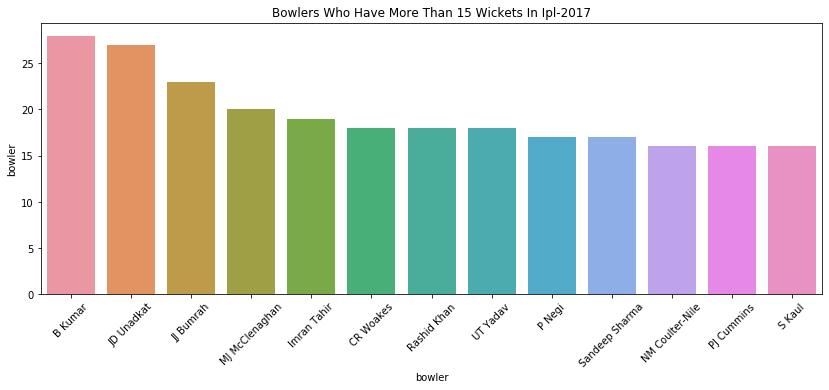

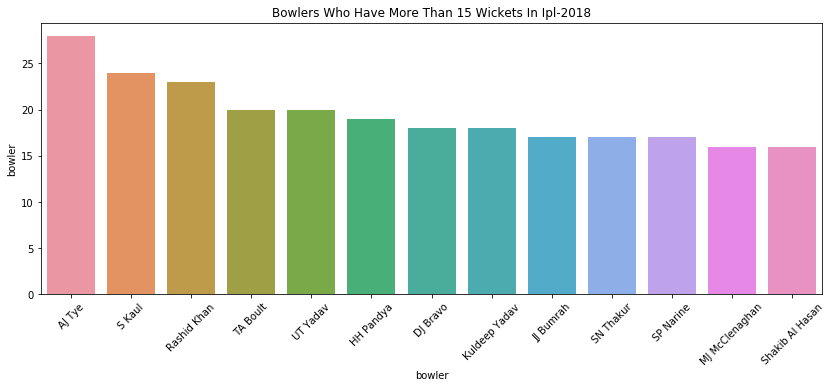

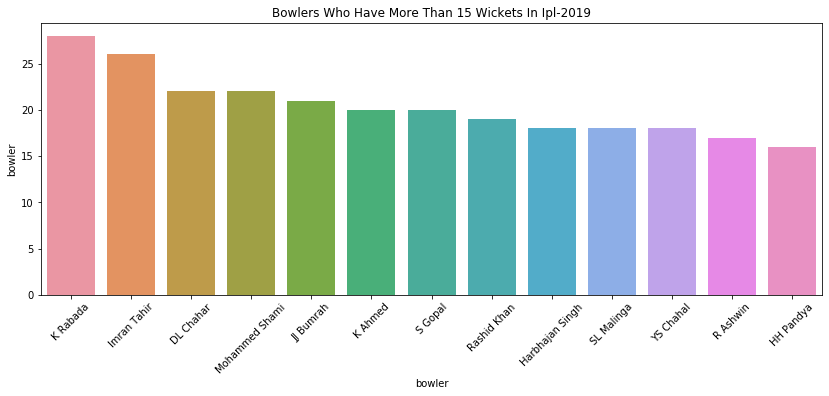

In [54]:
#ploting bowlers who have more than 15 wickets in each season
data = deliveries[deliveries["player_dismissed"].notnull()].groupby("Season")["bowler"].value_counts()
data = data[data>15]
for i in season:
    plt.figure(figsize=(14,5))
    plt.title("bowlers who have more than 15 wickets in {}".format(i).title())
    sns.barplot(x=data.loc[i].index, y=data.loc[i])
    plt.xticks(rotation=45)
    plt.show()

### Best Bowler Seasonwise

From above plot it is clear that :-
* In IPL-2008 **Sohail Tanvir** was the best bowler with highest wickets
* In IPL-2009 **RP Singh** was the best bowler with highest wickets
* In IPL-2010 **Pragyan Ojha** was the best bowler with highest wickets
* In IPL-2011 **Lasith Malinga** was the best bowler with highest wickets
* In IPL-2012 **Morne Morkel** was the best bowler with highest wickets
* In IPL-2013 **Dwayne Bravo** was the best bowler with highest wickets
* In IPL-2014 **Mohit Sharma** was the best bowler with highest wickets
* In IPL-2015 **Dwayne Bravo** was the best bowler with highest wickets
* In IPL-2016 **Bhuvneshwar Kumar** was the best bowler with highest wickets
* In IPL-2017 **Bhuvneshwar Kumar** was the best bowler with highest wickets
* In IPL-2018 **Andrew Tye** was the best bowler with highest wickets
* In IPL-2019 **Kangiso Rabada** was the best bowler with highest wickets


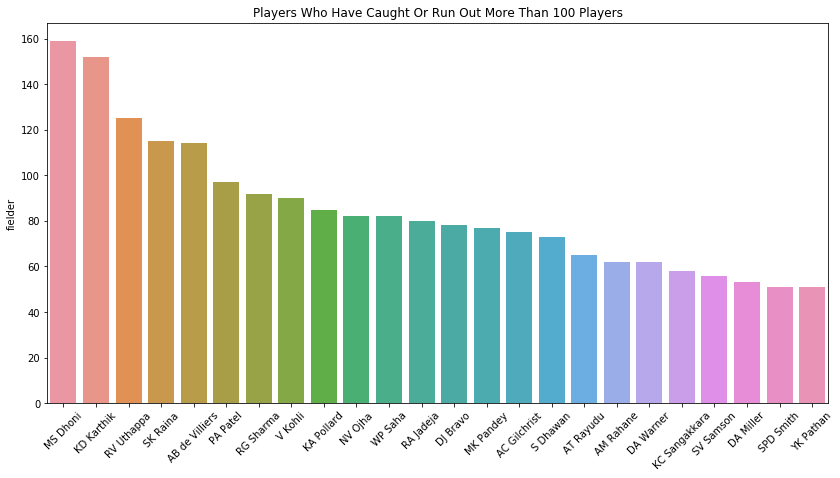

In [55]:
# ploting players who have caught or run out more than 50 players 
data = deliveries["fielder"].value_counts() 
data = data[data>50]
plt.figure(figsize=(14,7))
plt.title("players who have caught or run out more than 100 players".title())
sns.barplot(x=data.index, y=data)
plt.xticks(rotation=45)
plt.show()

## Best Fielder
From above plot it is clear that **MS Dhoni** is the best fielder

# Players Dataset

In [56]:
players.head()

,Player_Name,Batting_Hand,Bowling_Skill,Country,age
0,A Ashish Reddy,Right_Hand,Right-arm medium,India,30.0
1,A Chandila,Right_Hand,Right-arm offbreak,India,38.0
2,A Chopra,Right_Hand,Right-arm offbreak,India,44.0
3,A Choudhary,Right_hand,Left-arm fast-medium,NaN,37.0
4,A Dananjaya,Right_Hand,Right-arm offbreak,NaN,37.0


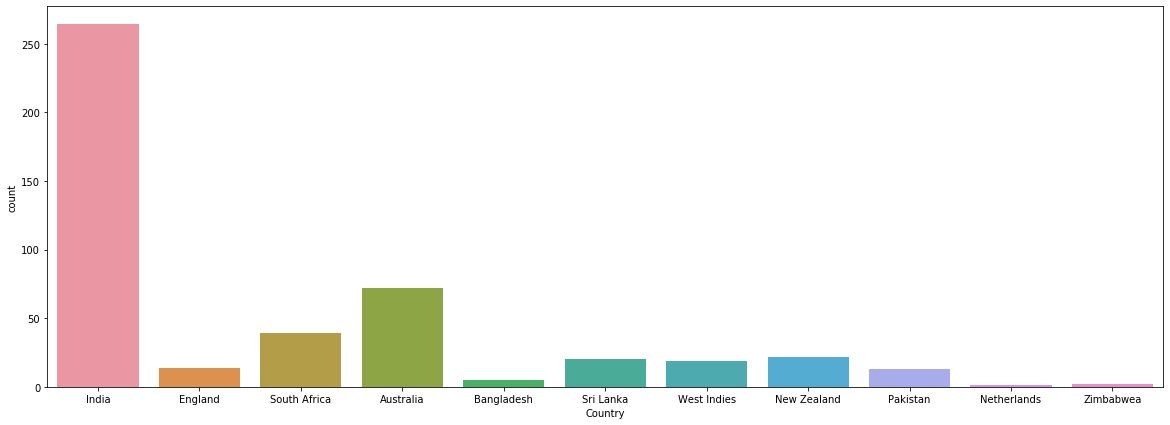

In [57]:
#ploting count of players from countries
plt.figure(figsize=(20,7))
sns.countplot(x="Country",data=players)
plt.show()

#### From Above Plot
It is clear that most of the players are from India which is a expected result ad Australia is second country to have highest players playing in IPL  

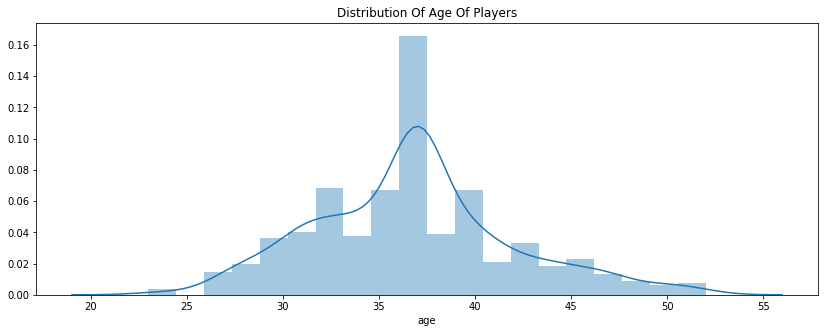

In [58]:
#ploting distribution of age of players
plt.figure(figsize=(14,5))
plt.title("distribution of age of players".title())
sns.distplot(players["age"])
plt.show()

#### From above plot
It can be seen that the age is normally distributed and most players are from age group 35-40

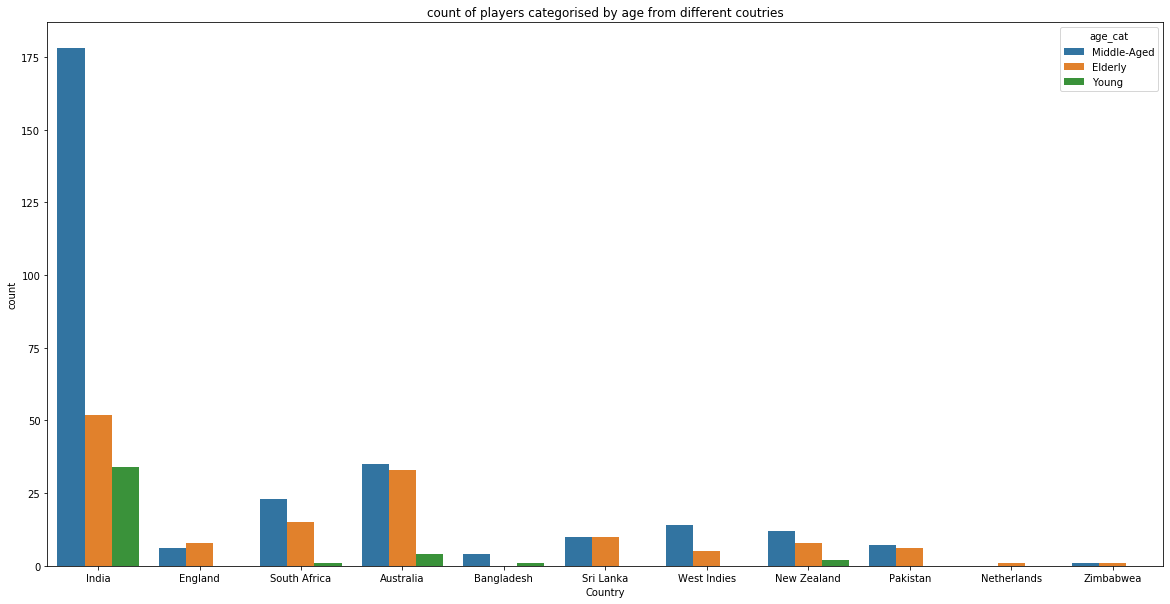

In [59]:
#ploting the count of players categorised by age from different coutries
players["age_cat"] = players["age"].apply(lambda x: "Young" if x<30 else ("Middle-Aged" if (x<40) and (x>=30) else "Elderly")) 
plt.figure(figsize=(20,10))
plt.title("count of players categorised by age from different coutries")
sns.countplot(x=players["Country"], hue=players["age_cat"])
plt.show()

#### From above plot
it is seen that players **Bagladesh** from bagladesh ae mostly young and middle aged and players from **England**, **Netherlands**, and **Zimbabwea** are mostly old

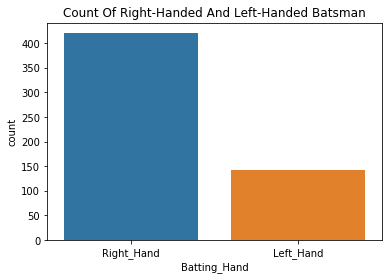

In [60]:
#ploting count of right-handed and left-handed batsman
players["Batting_Hand"] = players["Batting_Hand"].apply(lambda x: x.title() if type(x)==str else np.NaN) #fixing colum values 
plt.title("count of right-handed and left-handed batsman".title())
sns.countplot(players["Batting_Hand"])
plt.show()


#### From above plot
It can be see that there are more number of right handed batsman than left

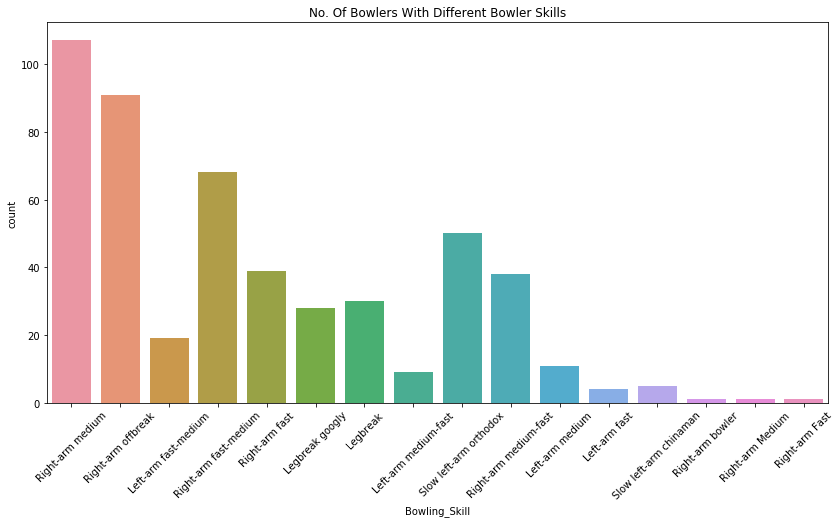

In [61]:
#ploting no. of bowlers with different bowler skills
plt.figure(figsize=(14,7))
sns.countplot(x=players["Bowling_Skill"])
plt.title("no. of bowlers with different bowler skills".title())
plt.xticks(rotation=45)
plt.show()

#### From Above Plot
it is clear that there are a large no. Right-Arm Medium bowlers the pobable reason for this can be that the there are more no. of Right-Handed batsman and they may struggle against Right-Arm Medium bowlers

In [62]:
#adding total runs column by merging most_runs_average_strikerate and players dataset
players = pd.merge(players,most_runs_average_strikerate[["batsman","total_runs"]],how='left',left_on="Player_Name",right_on="batsman")
players = players.drop("batsman",axis=1)
players.head()

,Player_Name,Batting_Hand,Bowling_Skill,Country,age,age_cat,total_runs
0,A Ashish Reddy,Right_Hand,Right-arm medium,India,30.0,Middle-Aged,280.0
1,A Chandila,Right_Hand,Right-arm offbreak,India,38.0,Middle-Aged,4.0
2,A Chopra,Right_Hand,Right-arm offbreak,India,44.0,Elderly,53.0
3,A Choudhary,Right_Hand,Left-arm fast-medium,NaN,37.0,Middle-Aged,25.0
4,A Dananjaya,Right_Hand,Right-arm offbreak,NaN,37.0,Middle-Aged,4.0


In [63]:
#adding total wickets column in players dataset usig deliveries dataset
data = deliveries[deliveries["player_dismissed"].notnull()]["bowler"].value_counts()
players = pd.merge(players,data,how='left',left_on='Player_Name',right_on=data.index)

In [64]:
players = players.rename({"bowler":"total_wickets"},axis=1)
players.head()

,Player_Name,Batting_Hand,Bowling_Skill,Country,age,age_cat,total_runs,total_wickets
0,A Ashish Reddy,Right_Hand,Right-arm medium,India,30.0,Middle-Aged,280.0,19.0
1,A Chandila,Right_Hand,Right-arm offbreak,India,38.0,Middle-Aged,4.0,11.0
2,A Chopra,Right_Hand,Right-arm offbreak,India,44.0,Elderly,53.0,NaN
3,A Choudhary,Right_Hand,Left-arm fast-medium,NaN,37.0,Middle-Aged,25.0,5.0
4,A Dananjaya,Right_Hand,Right-arm offbreak,NaN,37.0,Middle-Aged,4.0,NaN


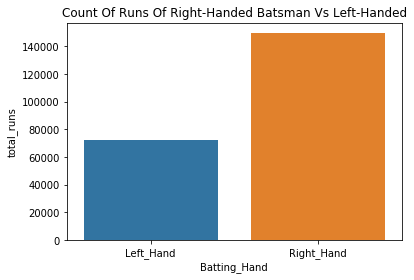

In [65]:
#ploting count of runs of right-handed batsman vs left-handed
data = players.groupby("Batting_Hand")["total_runs"].sum()
plt.title("count of runs of right-handed batsman vs left-handed".title())
sns.barplot(y=data,x=data.index)
plt.show()

#### From above plot
It is clear that on an average **Right_Handed** batsman score more runs 

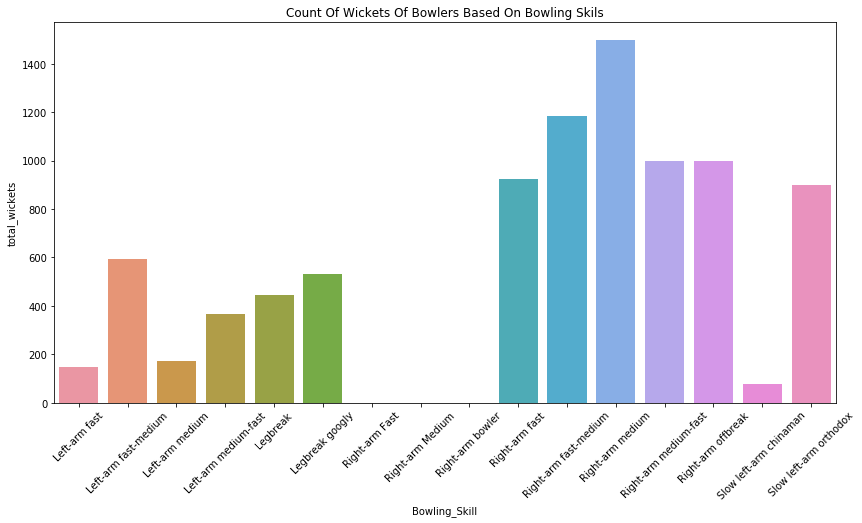

In [66]:
#ploting count of wickets of bowlers based on bowling skils 
data = players.groupby("Bowling_Skill")["total_wickets"].sum()
plt.figure(figsize=(14,7))
plt.title("count of wickets of bowlers based on bowling skils".title())
sns.barplot(y=data,x=data.index)
plt.xticks(rotation=45)
plt.show()

#### From Above Plot
It is clear that the **Right-Arm-Medium** bowlers has taken most wickets